In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
from tqdm import tqdm
import pandas as pd
import os
import numpy as np

# Preprocess Data

In [ ]:
%cd /content/drive/MyDrive/Projects/Outsource/ARIMA_LSTM/

/content/drive/.shortcut-targets-by-id/1sM7W-DhxB_yswKXliUhMIHFGpGzCSTex/ARIMA_LSTM


In [ ]:
%cd /content/drive/MyDrive/ARIMA_LSTM/

/content/drive/MyDrive/ARIMA_LSTM


In [ ]:
%ls

 300items_1-5.csv          Docs.gdoc
 300items_30-4.csv         E_commerce_Analytics__Update_1.ipynb
 300items.csv              model/
 ckpt/                     output/
 data/                    'Product 2023-04-13 17.18.45.csv'
 data_modified_1-5.csv    'Product 2023-04-13 17.18.48.zip'
 data_modified_19-04.csv  'Product Comments 2023-04-13 17.18.45.csv'
 data_modified_26-04.csv  'Product comments.csv'
 data_modified_30-04.csv   Ver1.ipynb


In [ ]:
raw_sold = pd.read_csv('./data/Product 2023-03-19 22.23.33.csv')

raw_comment = pd.read_csv('./data/Product Comments 2023-03-19 22.23.34.csv', on_bad_lines='skip', parse_dates=True)

<ipython-input-5-3fabbe9a6774>:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_comment = pd.read_csv('./data/Product Comments 2023-03-19 22.23.34.csv', on_bad_lines='skip', parse_dates=True)


In [ ]:
raw_sold = pd.read_csv('Product 2023-04-13 17.18.45.csv')

raw_comment = pd.read_csv('Product Comments 2023-04-13 17.18.45.csv', on_bad_lines='skip', parse_dates=True)

<ipython-input-21-e010cb57c335>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_comment = pd.read_csv('Product Comments 2023-04-13 17.18.45.csv', on_bad_lines='skip', parse_dates=True)


In [ ]:
raw_sold = pd.read_csv('./data/Product 2023-03-19 22.23.33.csv')

raw_comment_sentiment = pd.read_csv('Product comments.csv')

In [ ]:
raw_comment_sentiment

,Unnamed: 0,Item,ID,Name,Link,Number of Fetched Comments,Username,Comment time,Rating,Comments,comment,sentiment
0,2,NaN,NaN,NaN,NaN,NaN,7rfac745he,1.677037e+09,5.0,Chất liệu:nỉ\nMàu sắc:Hồng\nĐúng với mô tả:đún...,mô tảđúng,2
1,13,NaN,NaN,NaN,NaN,NaN,cattuong12_safia,1.676620e+09,5.0,Chất liệu:đc\nMàu sắc:đc\nĐúng với mô tả:khá\n...,mô tảkhá,2
2,20,NaN,NaN,NaN,NaN,NaN,zcuvpzlgb3,1.676218e+09,4.0,Đúng với mô tả:chiuu\nChất liệu:k bt\nMàu sắc:...,"màu sắc:hồng , đen",2
3,21,NaN,NaN,NaN,NaN,NaN,qh444g6ugl,1.675585e+09,5.0,Chất liệu:nir\nMàu sắc:hồng\nĐúng với mô tả:ye...,mô tảyes sure,2
4,45,NaN,NaN,NaN,NaN,NaN,ngalinh228,1.675693e+09,5.0,Màu sắc:thoi đen\nĐúng với mô tả:đúng\nChất li...,chất liệu:vair,2
...,...,...,...,...,...,...,...,...,...,...,...,...
16350,302858,NaN,NaN,NaN,NaN,NaN,2*****y,1.672494e+09,5.0,Màu sắc:be\nĐúng với mô tả:oke\nChất liệu:nhun...,"chất liệu:nhung , giao hàng nhanh , đúng với m...",2
16351,302898,NaN,NaN,NaN,NaN,NaN,23ki48se6r,1.676126e+09,5.0,Chất liệu:vải thô\nMàu sắc:be\nĐúng với mô tả:...,mô tảtuyệt dơig,2
16352,302904,NaN,NaN,NaN,NaN,NaN,annath66,1.651838e+09,5.0,Áo xịn lắm\nDầy mịn đẹp \nForm rộng rãi to bự ...,"form rộng rãi to bự , săn sale 5/5 mua giá rất...",2
16353,303172,NaN,NaN,NaN,NaN,NaN,khanhngan624,1.678445e+09,5.0,Chất liệu:dù hai lớp có túi trong\nMàu sắc:xan...,mô tảđúng ảnh mẫu,2


In [ ]:
raw_comment

,Item,ID,Name,Link,Number of Fetched Comments,Username,Comment time,Rating,Content
0,1,20247263063,Áo Khoác Cardigan Kẻ Thoi Form Rộng Đen/ Hồng ...,https://shopee.vn/hadesker-i.711707322.2024726...,1754,micutii774,1678971728,5,Chất liệu:nỉ\nMàu sắc:đen\nĐúng với mô tả:ui l...
1,NaN,NaN,NaN,NaN,NaN,micutii774,1678971728,5,Chất liệu:nỉ\nMàu sắc:đen\nĐúng với mô tả:ui l...
2,NaN,NaN,NaN,NaN,NaN,micutii774,1678971728,5,Chất liệu:nỉ\nMàu sắc:đen\nĐúng với mô tả:ui l...
3,NaN,NaN,NaN,NaN,NaN,micutii774,1678971728,5,Chất liệu:nỉ\nMàu sắc:đen\nĐúng với mô tả:ui l...
4,NaN,NaN,NaN,NaN,NaN,micutii774,1678971728,5,Chất liệu:nỉ\nMàu sắc:đen\nĐúng với mô tả:ui l...
...,...,...,...,...,...,...,...,...,...
316571,NaN,NaN,NaN,NaN,NaN,khnhvn814,1668311574,5,NaN
316572,NaN,NaN,NaN,NaN,NaN,vxorngahadung817,1668355294,5,NaN
316573,NaN,NaN,NaN,NaN,NaN,giaphutu825,1668328951,5,NaN
316574,NaN,NaN,NaN,NaN,NaN,0nvdmq3ups,1666852203,5,NaN


In [ ]:
raw_comment = raw_comment.fillna(method='ffill')

In [ ]:
raw_comment_sentiment = raw_comment_sentiment.fillna(method='ffill')

In [ ]:
raw_comment_sentiment

,Unnamed: 0,Item,ID,Name,Link,Number of Fetched Comments,Username,Comment time,Rating,Comments,comment,sentiment
0,2,NaN,NaN,NaN,NaN,NaN,7rfac745he,1.677037e+09,5.0,Chất liệu:nỉ\nMàu sắc:Hồng\nĐúng với mô tả:đún...,mô tảđúng,2
1,13,NaN,NaN,NaN,NaN,NaN,cattuong12_safia,1.676620e+09,5.0,Chất liệu:đc\nMàu sắc:đc\nĐúng với mô tả:khá\n...,mô tảkhá,2
2,20,NaN,NaN,NaN,NaN,NaN,zcuvpzlgb3,1.676218e+09,4.0,Đúng với mô tả:chiuu\nChất liệu:k bt\nMàu sắc:...,"màu sắc:hồng , đen",2
3,21,NaN,NaN,NaN,NaN,NaN,qh444g6ugl,1.675585e+09,5.0,Chất liệu:nir\nMàu sắc:hồng\nĐúng với mô tả:ye...,mô tảyes sure,2
4,45,NaN,NaN,NaN,NaN,NaN,ngalinh228,1.675693e+09,5.0,Màu sắc:thoi đen\nĐúng với mô tả:đúng\nChất li...,chất liệu:vair,2
...,...,...,...,...,...,...,...,...,...,...,...,...
16350,302858,295.0,1.259734e+10,Áo Khoác Jean Nữ Form Rộng UNISEX Nam Nữ Màu X...,https://shopee.vn/hadesker-i.6262159.12597339188,107.0,2*****y,1.672494e+09,5.0,Màu sắc:be\nĐúng với mô tả:oke\nChất liệu:nhun...,"chất liệu:nhung , giao hàng nhanh , đúng với m...",2
16351,302898,295.0,1.259734e+10,Áo Khoác Jean Nữ Form Rộng UNISEX Nam Nữ Màu X...,https://shopee.vn/hadesker-i.6262159.12597339188,107.0,23ki48se6r,1.676126e+09,5.0,Chất liệu:vải thô\nMàu sắc:be\nĐúng với mô tả:...,mô tảtuyệt dơig,2
16352,302904,295.0,1.259734e+10,Áo Khoác Jean Nữ Form Rộng UNISEX Nam Nữ Màu X...,https://shopee.vn/hadesker-i.6262159.12597339188,107.0,annath66,1.651838e+09,5.0,Áo xịn lắm\nDầy mịn đẹp \nForm rộng rãi to bự ...,"form rộng rãi to bự , săn sale 5/5 mua giá rất...",2
16353,303172,295.0,1.259734e+10,Áo Khoác Jean Nữ Form Rộng UNISEX Nam Nữ Màu X...,https://shopee.vn/hadesker-i.6262159.12597339188,107.0,khanhngan624,1.678445e+09,5.0,Chất liệu:dù hai lớp có túi trong\nMàu sắc:xan...,mô tảđúng ảnh mẫu,2


In [ ]:
filtered_records = []

for index, row in tqdm(raw_comment.iterrows(), total=raw_comment.shape[0]):
    try:
        id = int(row['Item'])
        comment_time = float(row['Comment time'])
        if id <= 300:
            filtered_records.append(row)
    except ValueError:
        pass

comment = pd.DataFrame(filtered_records)

100%|██████████| 316576/316576 [00:16<00:00, 18781.61it/s]


In [ ]:
filtered_records = []

for index, row in tqdm(raw_comment_sentiment.iterrows(), total=raw_comment_sentiment.shape[0]):
    try:
        id = int(row['Item'])
        comment_time = float(row['Comment time'])
        if id <= 300:
            filtered_records.append(row)
    except ValueError:
        pass

comment = pd.DataFrame(filtered_records)

100%|██████████| 16355/16355 [00:01<00:00, 11530.93it/s]


In [ ]:
comment["Datetime"] = pd.to_datetime(comment["Comment time"], unit="s")

In [ ]:
comment.reset_index(inplace=True)

In [ ]:
comment.drop_duplicates(subset="Datetime", inplace=True)
comment = comment[['Item', 'Datetime', 'Rating', 'comment','sentiment']]

In [ ]:
import re
def extract_comment(text):
    text = re.sub(r"\n", ", ", text)
    text = re.sub(r":", ": ", text)
    return text

comment["Content_re"] = comment["Content"].apply(extract_comment)

comment = comment[comment["Content_re"].apply(lambda x: len(x.split())) >= 3]

In [ ]:
comment

,Item,Datetime,Rating,Content,Content_re
0,1,2023-03-16 13:02:08,5,Chất liệu:nỉ\nMàu sắc:đen\nĐúng với mô tả:ui l...,"Chất liệu: nỉ, Màu sắc: đen, Đúng với mô tả: u..."
10,1,2023-02-12 16:13:37,4,Đúng với mô tả:chiuu\nChất liệu:k bt\nMàu sắc:...,"Đúng với mô tả: chiuu, Chất liệu: k bt, Màu sắ..."
22,1,2023-02-22 03:42:31,5,Chất liệu:nỉ\nMàu sắc:Hồng\nĐúng với mô tả:đún...,"Chất liệu: nỉ, Màu sắc: Hồng, Đúng với mô tả: ..."
54,1,2023-02-17 07:42:06,5,Chất liệu:đc\nMàu sắc:đc\nĐúng với mô tả:khá\n...,"Chất liệu: đc, Màu sắc: đc, Đúng với mô tả: kh..."
55,1,2023-01-24 07:47:08,5,Chất liệu:vải\nMàu sắc:đen\nĐúng với mô tả:cx ...,"Chất liệu: vải, Màu sắc: đen, Đúng với mô tả: ..."
...,...,...,...,...,...
190548,300,2022-11-02 00:48:55,5,Màu sắc:den\nChất liệu:ok\n\n79kg mặc hơi chật,"Màu sắc: den, Chất liệu: ok, , 79kg mặc hơi chật"
190549,300,2022-11-13 03:52:54,5,Màu sắc:den\nChất liệu:ok\n\n79kg mặc hơi chật,"Màu sắc: den, Chất liệu: ok, , 79kg mặc hơi chật"
190550,300,2022-11-13 16:01:34,5,Màu sắc:den\nChất liệu:ok\n\n79kg mặc hơi chật,"Màu sắc: den, Chất liệu: ok, , 79kg mặc hơi chật"
190551,300,2022-11-13 08:42:31,5,Màu sắc:den\nChất liệu:ok\n\n79kg mặc hơi chật,"Màu sắc: den, Chất liệu: ok, , 79kg mặc hơi chật"


In [ ]:
comment = comment.drop_duplicates(subset = "Content_re")

In [ ]:
comment["Item"] = comment["Item"].astype(int)
comment["Rating"] = comment["Rating"].astype(float)

In [ ]:
comment.sort_values(by=["Item", "Datetime"], ascending=[True, True], inplace=True)
comment

,Item,Datetime,Rating,comment,sentiment
52,2,2022-11-14 05:48:25,5.0,"mô tảđẹp , áo nhẹ, vải ko dày cx ko mỏng , m5-...",2
107,2,2022-11-15 10:03:35,5.0,chất liệu:dày,2
240,2,2022-11-15 10:45:16,4.0,mô tả...,1
161,2,2022-11-15 11:53:22,5.0,chất liệu:đẹp,2
29,2,2022-11-16 09:44:00,5.0,"mô tảchính xác , chất liệu áo đẹp , hàng về rấ...",2
...,...,...,...,...,...
16083,295,2023-03-06 14:22:57,5.0,"mô tảđúng , giao hàng nhanh , áo thì oki dc nó...",2
16049,295,2023-03-06 15:00:32,5.0,mô tảcũng okela ạ,2
16053,295,2023-03-08 13:05:18,5.0,"màu sắc:đen , bề ngang của áo hơi to í, mà áo ...",2
16168,295,2023-03-10 10:42:15,5.0,mô tảđúng ảnh mẫu,2


In [ ]:
comment["sentiment"].value_counts()

2    11381
1     3502
0     1269
Name: sentiment, dtype: int64

In [ ]:
da = comment.groupby(["Item","sentiment","Datetime"])["comment"].count().reset_index()
da[da["Item"] == 2]

,Item,sentiment,Datetime,comment
0,2,0,2022-11-17 05:22:51,1
1,2,0,2022-11-19 12:21:05,1
2,2,0,2022-11-20 04:37:34,1
3,2,0,2022-11-26 05:59:15,1
4,2,0,2022-12-02 02:11:58,1
...,...,...,...,...
289,2,2,2023-03-06 16:30:47,1
290,2,2,2023-03-09 06:12:24,1
291,2,2,2023-03-11 13:57:35,1
292,2,2,2023-03-17 12:21:40,1


In [ ]:
cal = comment.groupby(["Item","sentiment"])["comment"].count().unstack('sentiment', fill_value=0).reset_index()

In [ ]:
cal.columns = ["No_Item","Negative","Neutral","Positive"]

In [ ]:
cal["Total"] = cal["Negative"] + cal["Neutral"] + cal["Positive"]
cal["Negative"] = cal["Negative"]/cal["Total"]
cal["Neutral"] = cal["Neutral"]/cal["Total"]
cal["Positive"] = cal["Positive"]/cal["Total"]

In [ ]:
cal.to_csv("300items_1-5.csv",index= False)

In [ ]:
raw_sold = raw_sold.fillna(method='ffill')
raw_sold["Item"] = raw_sold["Item"].astype(int)
raw_sold["Quantity sold"] = raw_sold["Quantity sold"].astype(int)
raw_sold = raw_sold[['Item', 'Date', 'Quantity sold']]

raw_sold.rename(columns={'Item': 'item', 'Date': 'datetime', 'Quantity sold': 'q_sold'}, inplace=True)

In [ ]:
raw_sold['datetime'] = pd.to_datetime(raw_sold['datetime'], format="%d/%m/%Y")

In [ ]:
sold_1

,item,datetime,q_sold
0,1,2023-03-03,0
1,1,2023-03-04,19
2,1,2023-03-05,23
3,1,2023-03-06,13
4,1,2023-03-07,15
...,...,...,...
4847,300,2023-03-09,7
4848,300,2023-03-10,2
4849,300,2023-03-11,5
4850,300,2023-03-12,1


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from datetime import timedelta
new_sold = pd.DataFrame(columns=['item', 'datetime', 'q_sold'])
for i in tqdm(range(1,301)):
  sold1_item = sold_1[sold_1['item']==i]
  sold2_item = raw_sold[raw_sold['item']==i]
  lastest_date = sold1_item['datetime'].max()
  earliest_date = sold2_item['datetime'].min()
  try:
    diff_date = (earliest_date - lastest_date).days
    item = [i]*(int(diff_date)+1)
    datetime = [lastest_date + timedelta(days=j) for j in range(1, int(diff_date)+2)]
    history = sold1_item['q_sold'].tolist()[1:]
    q_sold = []
    for i in range(int(diff_date)+1):
      # model = ARIMA(history, order=(1,1,1))
      # model_fit = model.fit()
      # output = model_fit.forecast()
      # q_sold.append(output[0])
      # history.append(q_sold[-1])
      q_sold = [round(sold1_item['q_sold'].mean())]*(int(diff_date)+1)
      # q_sold = [test_[index]]*(int(diff_date)+1)
      fill_out = pd.DataFrame(zip(item, datetime, q_sold), columns=['item', 'datetime', 'q_sold'])
      item_df = pd.concat([sold1_item, fill_out, sold2_item.loc[1:]])
      new_sold = pd.concat([new_sold, item_df])
  except:
    print(i)
    # print(sold1_item)
    # print(sold2_item)


100%|██████████| 300/300 [00:04<00:00, 64.98it/s]


In [ ]:
sold_1 = raw_sold

In [ ]:
raw_sold

,item,datetime,q_sold
0,1,2023-03-03,0
1,1,2023-03-04,19
2,1,2023-03-05,23
3,1,2023-03-06,13
4,1,2023-03-07,15
...,...,...,...
4847,300,2023-03-09,7
4848,300,2023-03-10,2
4849,300,2023-03-11,5
4850,300,2023-03-12,1


In [ ]:
new_sold['q_sold'] = [round(i) for i in new_sold['q_sold'].tolist()]

In [ ]:
new_sold

,item,datetime,q_sold
0,1,2023-03-03,0
1,1,2023-03-04,19
2,1,2023-03-05,23
3,1,2023-03-06,13
4,1,2023-03-07,15
...,...,...,...
6413,300,2023-04-01,11
6414,300,2023-04-02,3
6415,300,2023-04-11,70
6416,300,2023-04-12,13


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from transformers import AutoTokenizer
# from vncorenlp import VnCoreNLP
from torch.utils.data import Dataset, DataLoader, RandomSampler

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

def model_fn(model_dir, model_name = "model.pt"):
    print("model_fn_sentiment")
    return torch.jit.load(os.path.join(model_dir, model_name), map_location=device)

def infer(model, tokenizer,  input_text, model_name = "vinai/phobert-base"):
    max_sequence_length = 256
    input_dict = tokenizer(
            input_text,
            max_length=max_sequence_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
    inputs = {
      "input_ids": torch.tensor(input_dict["input_ids"]).to(device),
      "attention_mask": torch.tensor(input_dict["attention_mask"]).to(device),
    }
    model.to(device)
    model.eval()
    with torch.no_grad():
        predictions, *_ = model(**inputs)
        predictions = torch.argmax(predictions, dim=1).flatten()
        predictions = predictions.detach().cpu().numpy()

    label_map = ["Negative","Neutral","Positive"]
    print(label_map[predictions[0]])
    return predictions

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
model_dir = "model"
model = model_fn(model_dir)

model_fn_sentiment


In [ ]:
class BertDataset(Dataset):
    def __init__(self, data, model_name, max_sequence_length):
        self.data = data
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.max_sequence_length = max_sequence_length

    def __getitem__(self, index):
        text_input = self.data["Content_re"].iloc[index]
        input_dict = self.tokenizer.encode_plus(
            text_input,
            max_length=self.max_sequence_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        inputs = {
            "input_ids": input_dict["input_ids"][0],
            "attention_mask": input_dict["attention_mask"][0],
        }
        if 'label' in self.data.columns: # in case, the predicted data have no this column
            inputs["labels"] = torch.tensor(self.data["label"].iloc[index], dtype=torch.long)
        return inputs

    def __len__(self):
        return len(self.data)

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, AutoModel

In [ ]:
def predict_bat(data, model_name = "vinai/phobert-base"):
    df = data[["Content_re"]]
    print(f"Data contains {len(df)} rows")

    test_dataset = BertDataset(df, model_name, 64)
    model_dir = "model"
    model = model_fn(model_dir)
    args = TrainingArguments(output_dir='./output', per_device_eval_batch_size=256)
    trainer = Trainer(
        model=model,
        args=args
    )

    class_names = ["negative", "neutral", "positive"]
    predictions, *_ = trainer.predict(test_dataset)

    # predictions = torch.softmax(torch.tensor(predictions), dim=1)
    predictions = predictions.argmax(-1)
    # data["negative"] = predictions[:,0].tolist()
    # data['neutral'] = predictions[:,1].tolist()
    # data['positive'] = predictions[:,-1].tolist()
    data["sentiment"] = predictions

    return data

In [ ]:
comment = predict_bat(comment)

Data contains 117527 rows


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model_fn_sentiment


AttributeError: ignored

In [ ]:
comment = comment[['Item', 'Rating', 'Datetime', 'negative', 'neutral', 'positive']]

In [ ]:
comment["sentiment"].value_counts()

In [ ]:
comment

,Item,Datetime,Rating,comment
52,2,2022-11-14 05:48:25,5.0,"mô tảđẹp , áo nhẹ, vải ko dày cx ko mỏng , m5-..."
107,2,2022-11-15 10:03:35,5.0,chất liệu:dày
240,2,2022-11-15 10:45:16,4.0,mô tả...
161,2,2022-11-15 11:53:22,5.0,chất liệu:đẹp
29,2,2022-11-16 09:44:00,5.0,"mô tảchính xác , chất liệu áo đẹp , hàng về rấ..."
...,...,...,...,...
16083,295,2023-03-06 14:22:57,5.0,"mô tảđúng , giao hàng nhanh , áo thì oki dc nó..."
16049,295,2023-03-06 15:00:32,5.0,mô tảcũng okela ạ
16053,295,2023-03-08 13:05:18,5.0,"màu sắc:đen , bề ngang của áo hơi to í, mà áo ..."
16168,295,2023-03-10 10:42:15,5.0,mô tảđúng ảnh mẫu


In [ ]:
da = comment.groupby(["Item","sentiment","Datetime"])["Content_re"].count().reset_index()
da[da["Item"] == 1]

,Item,sentiment,Datetime,Content_re
0,1,0,2022-10-11 12:43:35,1
1,1,0,2022-10-13 10:38:55,1
2,1,0,2022-10-18 10:58:35,1
3,1,0,2022-10-18 17:21:18,1
4,1,0,2022-10-19 14:25:04,1
...,...,...,...,...
166,1,2,2023-03-13 11:25:04,1
167,1,2,2023-03-17 04:57:43,1
168,1,2,2023-03-18 07:36:08,1
169,1,2,2023-03-21 11:45:29,1


In [ ]:
cal = comment.groupby(["Item","sentiment"])["Content_re"].count().unstack('sentiment', fill_value=0).reset_index()

In [ ]:
cal.columns = ["Item","Negative","Neutral","Positive"]

In [ ]:
cal["Total"] = cal["Negative"] + cal["Neutral"] + cal["Positive"]
cal["Negative"] = cal["Negative"]/cal["Total"]
cal["Neutral"] = cal["Neutral"]/cal["Total"]
cal["Positive"] = cal["Positive"]/cal["Total"]

In [ ]:
cal.to_csv("300items.csv",index= False)

In [ ]:
comment

,Item,Datetime,Rating,Content,Content_re,sentiment
97,1,2022-09-29 12:11:03,5.0,Chất liệu:ko biết\nMàu sắc:đen trắng\nĐúng với...,"Chất liệu: ko biết, Màu sắc: đen trắng, Đúng v...",2
174,1,2022-10-04 04:42:52,5.0,Chất liệu:vải\nMàu sắc:đen trănsg\nĐúng với mô...,"Chất liệu: vải, Màu sắc: đen trănsg, Đúng với ...",2
183,1,2022-10-05 05:10:46,5.0,Đẹp không có gì để tả nổi ạ mọi người nên mua ...,Đẹp không có gì để tả nổi ạ mọi người nên mua ...,2
197,1,2022-10-05 14:28:56,5.0,"Vải khá được so với giá tiền, shipper nhiệt tì...","Vải khá được so với giá tiền, shipper nhiệt tì...",2
172,1,2022-10-07 08:59:24,5.0,"áo xinh ạ. form dày đẹp. mặc được bạn khen, áo...","áo xinh ạ. form dày đẹp. mặc được bạn khen, áo...",2
...,...,...,...,...,...,...
190081,300,2023-03-28 16:55:26,5.0,"Quần dày dặn đẹp vải ấm áp, áo rất ok ủng hộ s...","Quần dày dặn đẹp vải ấm áp, áo rất ok ủng hộ s...",2
190083,300,2023-03-28 17:05:37,5.0,Mua lần 2 trên shop này rồi còn được tặng kèm ...,Mua lần 2 trên shop này rồi còn được tặng kèm ...,2
189849,300,2023-03-28 17:17:54,5.0,Hàng ok lắm nè . Chú shipper thân thiện lắm lu...,Hàng ok lắm nè . Chú shipper thân thiện lắm lu...,2
189851,300,2023-03-30 13:49:46,5.0,Cảm ơn shop nhiều nhiều ạ. mai em được nghỉ có...,Cảm ơn shop nhiều nhiều ạ. mai em được nghỉ có...,2


In [ ]:
new_sold

,item,datetime,q_sold
0,1,2023-03-03,0
1,1,2023-03-04,19
2,1,2023-03-05,23
3,1,2023-03-06,13
4,1,2023-03-07,15
...,...,...,...
6413,300,2023-04-01,11
6414,300,2023-04-02,3
6415,300,2023-04-11,70
6416,300,2023-04-12,13


In [ ]:
df = pd.merge(new_sold,cal, how ="inner",left_on = "item", right_on = "Item" )

In [ ]:
df

,item,datetime,q_sold,Item,Negative,Neutral,Positive,Total
0,1,2023-03-03,0,1,0.081871,0.175439,0.742690,171
1,1,2023-03-04,19,1,0.081871,0.175439,0.742690,171
2,1,2023-03-05,23,1,0.081871,0.175439,0.742690,171
3,1,2023-03-06,13,1,0.081871,0.175439,0.742690,171
4,1,2023-03-07,15,1,0.081871,0.175439,0.742690,171
...,...,...,...,...,...,...,...,...
12803,300,2023-04-01,11,300,0.122093,0.081395,0.796512,344
12804,300,2023-04-02,3,300,0.122093,0.081395,0.796512,344
12805,300,2023-04-11,70,300,0.122093,0.081395,0.796512,344
12806,300,2023-04-12,13,300,0.122093,0.081395,0.796512,344


In [ ]:
df = pd.merge(raw_sold,cal, how ="inner",left_on = "item", right_on = "No_Item" )

In [ ]:
df

,item,datetime,q_sold,No_Item,Negative,Neutral,Positive,Total
0,2,2023-03-03,0,2,0.085034,0.183673,0.731293,294
1,2,2023-03-04,27,2,0.085034,0.183673,0.731293,294
2,2,2023-03-05,23,2,0.085034,0.183673,0.731293,294
3,2,2023-03-06,48,2,0.085034,0.183673,0.731293,294
4,2,2023-03-07,20,2,0.085034,0.183673,0.731293,294
...,...,...,...,...,...,...,...,...
1212,295,2023-03-15,7,295,0.068493,0.136986,0.794521,146
1213,295,2023-03-16,8,295,0.068493,0.136986,0.794521,146
1214,295,2023-03-17,6,295,0.068493,0.136986,0.794521,146
1215,295,2023-03-18,6,295,0.068493,0.136986,0.794521,146


In [ ]:
avg_neu, avg_neg, avg_pos, rating = [], [], [], []
for i in tqdm(range(1, 301)):
    current_day = pd.Timestamp('2023-03-03')
    all_comment = comment[comment['Item']==i]
    all_sold = new_sold[new_sold['item']==i]
    sold_record = len(all_sold[all_sold['datetime']>=current_day])

    for j in range(sold_record):
        current_day += pd.Timedelta(days=1)
        comment_record = all_comment[all_comment['Datetime']<current_day]
        if len(comment_record) == 0:
            # avg_neg.append(1/3)
            # avg_neu.append(1/3)
            # avg_pos.append(1/3)
            rating.append(0)
        else:
              avg_neg = cal["Negative"]
              avg_neu = cal["Neutral"]
              avg_pos = cal["Positive"]
            # avg_neu.append(comment_record['neutral'].mean())
            # avg_neg.append(comment_record['negative'].mean())
            # avg_pos.append(comment_record['positive'].mean())
              rating.append(comment_record['Rating'].mean())


100%|██████████| 300/300 [00:10<00:00, 29.40it/s]


In [ ]:
new_sold['avg_neg'] = avg_neg
new_sold['avg_neu'] = avg_neu
new_sold['avg_pos'] = avg_pos
new_sold['avg_rate'] = rating

In [ ]:
df = raw_sold

In [ ]:
df

,item,datetime,q_sold
0,1,2023-03-03,0
1,1,2023-03-04,19
2,1,2023-03-05,23
3,1,2023-03-06,13
4,1,2023-03-07,15
...,...,...,...
4847,300,2023-03-09,7
4848,300,2023-03-10,2
4849,300,2023-03-11,5
4850,300,2023-03-12,1


In [ ]:
df = df.fillna(value=0)

In [ ]:
df

,item,datetime,q_sold
0,1,2023-03-03,0
1,1,2023-03-04,19
2,1,2023-03-05,23
3,1,2023-03-06,13
4,1,2023-03-07,15
...,...,...,...
4847,300,2023-03-09,7
4848,300,2023-03-10,2
4849,300,2023-03-11,5
4850,300,2023-03-12,1


In [ ]:
df = df[df['datetime']!='2023-03-03']

In [ ]:
df['label'] = df['q_sold'].shift(periods=-1)
df = df[df['label'] > 0]

<ipython-input-14-bd2c725009ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['q_sold'].shift(periods=-1)


In [ ]:
df = df[df['q_sold']>0]
df

,item,datetime,q_sold,label
1,1,2023-03-04,19,23.0
2,1,2023-03-05,23,13.0
3,1,2023-03-06,13,15.0
4,1,2023-03-07,15,21.0
5,1,2023-03-08,21,17.0
...,...,...,...,...
4845,300,2023-03-07,3,5.0
4846,300,2023-03-08,5,7.0
4847,300,2023-03-09,7,2.0
4848,300,2023-03-10,2,5.0


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df = df.drop(columns=['index'])

In [ ]:
df = df.drop(21)

In [ ]:
df[df['item']==2]

,index,item,datetime,q_sold,No_Item,Negative,Neutral,Positive,Total,label
0,1,2,2023-03-04,27,2,0.085034,0.183673,0.731293,294,23.0
1,2,2,2023-03-05,23,2,0.085034,0.183673,0.731293,294,48.0
2,3,2,2023-03-06,48,2,0.085034,0.183673,0.731293,294,20.0
3,4,2,2023-03-07,20,2,0.085034,0.183673,0.731293,294,26.0
4,5,2,2023-03-08,26,2,0.085034,0.183673,0.731293,294,38.0
5,6,2,2023-03-09,38,2,0.085034,0.183673,0.731293,294,22.0
6,7,2,2023-03-10,22,2,0.085034,0.183673,0.731293,294,39.0
7,8,2,2023-03-11,39,2,0.085034,0.183673,0.731293,294,29.0
8,9,2,2023-03-12,29,2,0.085034,0.183673,0.731293,294,20.0
9,10,2,2023-03-13,20,2,0.085034,0.183673,0.731293,294,22.0


In [ ]:
df

,item,datetime,q_sold,avg_neg,avg_neu,avg_pos,avg_rate,label
0,1,2023-03-04,19,0.030303,0.136364,0.833333,4.438710,23.0
1,1,2023-03-05,23,0.018781,0.093139,0.888080,4.449367,13.0
2,1,2023-03-06,13,0.040123,0.119342,0.840535,4.452830,15.0
3,1,2023-03-07,15,0.023454,0.117271,0.859275,4.452830,21.0
4,1,2023-03-08,21,0.000000,0.133333,0.866667,4.456250,17.0
...,...,...,...,...,...,...,...,...
11111,300,2023-03-31,12,0.000000,0.000000,0.000000,4.372093,11.0
11112,300,2023-04-01,11,0.000000,0.000000,0.000000,4.372093,3.0
11113,300,2023-04-02,3,0.000000,0.000000,0.000000,4.372093,70.0
11114,300,2023-04-11,70,0.000000,0.000000,0.000000,4.372093,13.0


In [ ]:
df.to_csv('/content/drive/MyDrive/Projects/Outsource/ARIMA_LSTM/data_modified_19-04.csv')
# data 41 days (4/3/2023-> 13/4/2023) => dùng 3 label sentiment comment tính mean cf score tích lũy của các ngày trước đó, bỏ comment null

In [ ]:
df.to_csv('/content/drive/MyDrive/ARIMA_LSTM/data_modified_26-04.csv')
# data 41 days (4/3/2023-> 13/4/2023) => dùng 3 label sentiment comment lấy 3 nhãn làm tròn 0,1,2 sau hàm softmax từ kqua phoBERT

In [ ]:
df.to_csv('/content/drive/MyDrive/ARIMA_LSTM/data_modified_30-04.csv')
# data 15 days (4/3/2023-_ 18/3/2023) => dùng file predicted sentiment ra 0,1,2 từ file "Product comments.csv", có chạy lại process comment thêm và merge vs df qsold đã process theo Item

In [ ]:
df.to_csv('/content/drive/MyDrive/ARIMA_LSTM/data_modified_1-5.csv')
# data 15 days (4/3/2023-_ 18/3/2023) => dùng file predicted sentiment ra 0,1,2 từ file "Product comments.csv" merge vs df qsold đã process theo Item

# Load data

In [ ]:
%cd /content/drive/MyDrive/Projects/Outsource/ARIMA_LSTM

/content/drive/.shortcut-targets-by-id/1sM7W-DhxB_yswKXliUhMIHFGpGzCSTex/ARIMA_LSTM


In [ ]:
%cd /content/drive/MyDrive/ARIMA_LSTM

/content/drive/MyDrive/ARIMA_LSTM


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/check.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ARIMA_LSTM/data/processed_data_14-4.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ARIMA_LSTM/data_modified_19-04.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ARIMA_LSTM/data_modified_26-04.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ARIMA_LSTM/data_modified_30-04.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ARIMA_LSTM/data_modified_1-5.csv')

In [ ]:
def make_sample(df, n, sentiment=False, regressor=False, multi_model=False):
    X, y = [], []
    for i in tqdm(range(1,301)):
        if multi_model:
            x_item = []
            y_item = []
        all_sample = df[df['item']==i]
        list_x = all_sample['q_sold'].tolist()
        list_y = all_sample['label'].tolist()
        # x_sen = [all_sample['avg_neg'].tolist(), all_sample['avg_pos'].tolist(), all_sample['avg_neu'].tolist()]
        x_sen = [all_sample['Negative'].tolist(), all_sample['Positive'].tolist(), all_sample['Neutral'].tolist()]
        # x_rate = all_sample['avg_rate'].tolist()
        index = [i] if regressor else []
        for j in range(0, len(all_sample)-n+1):
            X_sen, X_rate = [], []
            if sentiment:
                for label in x_sen:
                    if X_sen == []:
                        X_sen = [sum(label[j:j+n])]
                    else:
                        X_sen += [sum(label[j:j+n])]
                sum_ = sum(X_sen)
                X_sen = [i/sum_ for i in X_sen]
            # if rating:
            #     # X_rate =  [sum(x_rate[j:j+n])/n]
            # # X_ = index + list_x[j:j+n] + X_sen + X_rate

            if multi_model:
                x_item.append(X_sen)
                # y_item.append(list_x[j+n])
                y_item.append([list_y[j+n-1]])
            else:
                X.append(X_sen)
                # y.append(list_x[j+n])
                y.append([list_y[j+n-1]])
        if multi_model:
            X.append(np.array(x_item))
            y.append(np.array(y_item))
    if multi_model:
        return X, y
    return np.array(X), np.array(y)

def split(df, fraction=0.9, n=1, method=None, sentiment=False, rating=False, regressor=False, multi_model=False):

    if method=='by_item':
        # X, y = make_sample(df, n, sentiment=sentiment, rating=rating, regressor=regressor)
        X, y = make_sample(df, n, sentiment=sentiment, regressor=regressor)
        num_train_sample = round(len(X)*fraction)
        return X[:num_train_sample], X[num_train_sample:], y[:num_train_sample], y[num_train_sample:]

    elif method=='by_date':
        train, test = df[df["datetime"] <= "2023-03-14"], df[df["datetime"] > "2023-03-14"]
        X_train, y_train = make_sample(train, n, sentiment=sentiment, regressor=regressor, multi_model=multi_model)
        X_test, y_test = make_sample(test, n, sentiment=sentiment, regressor=regressor, multi_model=multi_model)
        return X_train, y_train, X_test, y_test

# ML function

In [ ]:
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error

import matplotlib.pyplot as plt

## Model load and configure

In [ ]:
clf = LinearRegression(n_jobs=-1)
DTRmodel = DecisionTreeRegressor(max_depth=3, random_state=0)
RFRmodel = RandomForestRegressor(max_depth=3, random_state=0)

In [ ]:
X_train, y_train, X_test, y_test = split(df, method='by_date', regressor=True, sentiment=True, rating=False, n=1)

100%|██████████| 300/300 [00:00<00:00, 1794.68it/s]


In [ ]:
X_train.shape

(10105, 2)

### Multi - model

In [ ]:
method = ['clf', 'dt', 'rf']
metrics = ['r2', 'mse', 'mae', 'rmse']
count = 0
loss = {}
for i in method:
    if i not in loss.keys():
        loss[i] = {}
    for j in metrics:
        if j not in loss[i].keys():
            loss[i][j] = []

# try:
#     X_train, y_train, X_test, y_test = split(df, method='by_date', regressor=True, n=1,sentiment=False, multi_model=True)
# except ZeroDivisionError:
#                          X_train, y_train, X_test, y_test = None
X_train, y_train, X_test, y_test = split(df, method='by_date', regressor=True, n=1,sentiment=False, multi_model=True)

valid_n = [1,2,3]

for item in tqdm(range(len(X_train))):
    try:
        clf.fit(X_train[item], y_train[item])
        DTRmodel.fit(X_train[item], y_train[item])
        RFRmodel.fit(X_train[item], y_train[item])
        result = [clf.predict(X_test[item]), DTRmodel.predict(X_test[item]), RFRmodel.predict(X_test[item])]
        metrics_score = [r2_score, mean_squared_error, mean_absolute_error]

        for num_method, i in enumerate(method):
            for num_metric, j in enumerate(metrics):
                if num_metric != 3:
                    y_test[item]
                    result[num_method]
                    metrics_score[num_metric]
                    loss[i][j].append(metrics_score[num_metric](y_test[item], result[num_method]))
                else:
                    loss[i][j].append(sqrt(mean_squared_error(y_test[item], result[num_method])))
    except:
        count+=1

for method in loss.keys():
    for metric in loss[method].keys():
        loss[method][metric] = np.nanmean(loss[method][metric])

loss

100%|██████████| 300/300 [00:00<00:00, 3053.82it/s]
<ipython-input-73-5778022e04f6>:42: RuntimeWarning: Mean of empty slice
  loss[method][metric] = np.nanmean(loss[method][metric])


{'clf': {'r2': nan, 'mse': nan, 'mae': nan, 'rmse': nan},
 'dt': {'r2': nan, 'mse': nan, 'mae': nan, 'rmse': nan},
 'rf': {'r2': nan, 'mse': nan, 'mae': nan, 'rmse': nan}}

In [ ]:
### split dataset by date
train, test = df[df["datetime"] <= "2023-03-14"],df[df["datetime"] > "2023-03-14"]
X_train ,y_train = train[["q_sold","item"]], train["label"]
X_test ,y_test = test[["q_sold","item"]], test["label"]

In [ ]:
train["q_sold"]

0       19
1       23
2       13
3       15
4       21
        ..
4290     3
4291     5
4292     7
4293     2
4294     5
Name: q_sold, Length: 3012, dtype: int64

In [ ]:
X_train ,y_train = train[["q_sold"]], train["label"]
X_test ,y_test = test[["q_sold"]], test["label"]

In [ ]:
train.to_csv("train_0905.csv")
test.to_csv("test_0905.csv")

In [ ]:
X_train ,y_train = train[["q_sold","item"]], train["label"]
X_test ,y_test = test[["q_sold","item"]], test["label"]

In [ ]:
clf = LinearRegression(n_jobs=-1)
DTRmodel = DecisionTreeRegressor(max_depth=3, random_state=0)
RFRmodel = RandomForestRegressor(max_depth=3, random_state=0)

In [ ]:
clf.fit(X_train, y_train)
DTRmodel.fit(X_train, y_train)
RFRmodel.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [ ]:
import math
from math import sqrt

In [ ]:
confidence0 = clf.score(X_test, y_test)
y_pred0 = clf.predict(X_test)
print("R2 score  :", r2_score(y_test, y_pred0))
print("MSE score  :", mean_squared_error(y_test, y_pred0))
print("MAPE  :", mean_absolute_percentage_error(y_test, y_pred0))
print("MAE score :", mean_absolute_error(y_test, y_pred0))
print("MSLE score :", mean_squared_log_error(y_test, y_pred0))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred0)))

R2 score  : 0.5386701999487209
MSE score  : 35.136024072000225
MAPE  : 0.7187631913402219
MAE score : 4.03317112561482
MSLE score : 0.2715224188501461
RMSE:  5.927564767423484


In [ ]:
confidence1 = DTRmodel.score(X_test, y_test)
y_pred1 = DTRmodel.predict(X_test)
print("R2 score  :", r2_score(y_test, y_pred1))
print("MSE score  :", mean_squared_error(y_test, y_pred1))
print("MAPE  :", mean_absolute_percentage_error(y_test, y_pred0))
print("MAE score :", mean_absolute_error(y_test, y_pred0))
print("MSLE score :", mean_squared_log_error(y_test, y_pred0))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.5223834822750641
MSE score  : 36.37646096589232
MAPE  : 0.7187631913402219
MAE score : 4.03317112561482
MSLE score : 0.2715224188501461
RMSE:  6.031290157660492


In [ ]:
y_pred2 = RFRmodel.predict(X_test)
confidence2 = RFRmodel.score(X_test, y_test)
print("R2 score  :", r2_score(y_test, y_pred2))
print("MSE score  :", mean_squared_error(y_test, y_pred2))
print("MAPE  :", mean_absolute_percentage_error(y_test, y_pred0))
print("MAE score :", mean_absolute_error(y_test, y_pred0))
print("MSLE score :", mean_squared_log_error(y_test, y_pred0))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred2)))

R2 score  : 0.5418475707929635
MSE score  : 34.89402761207812
MAPE  : 0.7187631913402219
MAE score : 4.03317112561482
MSLE score : 0.2715224188501461
RMSE:  5.907116691930008


In [ ]:
X_train.shape

(762, 1)

In [ ]:
train, test = df[df["datetime"] <= "2023-03-14"],df[df["datetime"] > "2023-03-14"]
X_train ,y_train = train[["q_sold","item","Negative","Neutral","Positive"]], train["label"]
X_test ,y_test = test[["q_sold","item","Negative","Neutral","Positive"]], test["label"]

In [ ]:
X_train ,y_train = train[["q_sold","Negative","Neutral","Positive"]], train["label"]
X_test ,y_test = test[["q_sold","Negative","Neutral","Positive"]], test["label"]

In [ ]:
X_train.head()

,q_sold,Negative,Neutral,Positive
0,27,0.085034,0.183673,0.731293
1,23,0.085034,0.183673,0.731293
2,48,0.085034,0.183673,0.731293
3,20,0.085034,0.183673,0.731293
4,26,0.085034,0.183673,0.731293


In [ ]:
clf = LinearRegression(n_jobs=-1)
DTRmodel = DecisionTreeRegressor(max_depth=3, random_state=0)
RFRmodel = RandomForestRegressor(max_depth=3, random_state=0)

In [ ]:
clf.fit(X_train, y_train)
DTRmodel.fit(X_train, y_train)
RFRmodel.fit(X_train, y_train)
clf.score(X_train, y_train) , DTRmodel.score(X_train, y_train), RFRmodel.score(X_train, y_train)

(0.4657686688866427, 0.5643414800145247, 0.5805488093822757)

In [ ]:
confidence0 = clf.score(X_test, y_test)
y_pred0 = clf.predict(X_test)
print("R2 score  :", r2_score(y_test, y_pred0))
print("MSE score  :", mean_squared_error(y_test, y_pred0))
print("MAPE  :", mean_absolute_percentage_error(y_test, y_pred0))
print("MAE score :", mean_absolute_error(y_test, y_pred0))
print("MSLE score :", mean_squared_log_error(y_test, y_pred0))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred0)))

R2 score  : 0.5374959568187759
MSE score  : 35.22545734701419
MAPE  : 0.7184365620549635
MAE score : 4.035793430719735
MSLE score : 0.27195108918329375
RMSE:  5.9351038193964385


In [ ]:
confidence1 = DTRmodel.score(X_test, y_test)
y_pred0 = DTRmodel.predict(X_test)
print("R2 score  :", r2_score(y_test, y_pred0))
print("MSE score  :", mean_squared_error(y_test, y_pred0))
print("MAPE  :", mean_absolute_percentage_error(y_test, y_pred0))
print("MAE score :", mean_absolute_error(y_test, y_pred0))
print("MSLE score :", mean_squared_log_error(y_test, y_pred0))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred0)))

R2 score  : 0.4813682313516504
MSE score  : 39.50028440761234
MAPE  : 0.7604179464788484
MAE score : 4.224336641178615
MSLE score : 0.29928698962106015
RMSE:  6.284925171202307


In [ ]:
confidence0 = RFRmodel.score(X_test, y_test)
y_pred0 = RFRmodel.predict(X_test)
print("R2 score  :", r2_score(y_test, y_pred0))
print("MSE score  :", mean_squared_error(y_test, y_pred0))
print("MAPE  :", mean_absolute_percentage_error(y_test, y_pred0))
print("MAE score :", mean_absolute_error(y_test, y_pred0))
print("MSLE score :", mean_squared_log_error(y_test, y_pred0))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred0)))

R2 score  : 0.5330110686720485
MSE score  : 35.56703757414482
MAPE  : 0.7381600983864045
MAE score : 3.9904228254995098
MSLE score : 0.28276861473317827
RMSE:  5.963810658810759


In [ ]:
clf.predict(X_test.head(1))

array([6.97854768])

In [ ]:
X_test.head(11)

,q_sold,item,avg_neg,avg_neu,avg_pos,avg_rate
35,6,1,0.038462,0.102564,0.858974,4.426901
36,9,1,0.052326,0.171512,0.776163,4.426901
37,3,1,0.091153,0.067024,0.841823,4.426901
38,5,1,0.115942,0.188406,0.695652,4.426901
76,18,2,0.011364,0.147727,0.840909,4.772727
77,13,2,0.034739,0.099256,0.866005,4.772727
78,9,2,0.030388,0.113168,0.856444,4.772727
79,11,2,0.095745,0.095745,0.808511,4.772727
113,13,3,0.081081,0.189189,0.729730,4.940590
114,11,3,0.039735,0.175497,0.784768,4.940590


### Single Model

In [ ]:
df

,Unnamed: 0,index,item,datetime,q_sold,No_Item,Negative,Neutral,Positive,Total,label
0,0,1,2,2023-03-04,27,2,0.085034,0.183673,0.731293,294,23.0
1,1,2,2,2023-03-05,23,2,0.085034,0.183673,0.731293,294,48.0
2,2,3,2,2023-03-06,48,2,0.085034,0.183673,0.731293,294,20.0
3,3,4,2,2023-03-07,20,2,0.085034,0.183673,0.731293,294,26.0
4,4,5,2,2023-03-08,26,2,0.085034,0.183673,0.731293,294,38.0
...,...,...,...,...,...,...,...,...,...,...,...
1017,1017,1211,295,2023-03-14,18,295,0.068493,0.136986,0.794521,146,7.0
1018,1018,1212,295,2023-03-15,7,295,0.068493,0.136986,0.794521,146,8.0
1019,1019,1213,295,2023-03-16,8,295,0.068493,0.136986,0.794521,146,6.0
1020,1020,1214,295,2023-03-17,6,295,0.068493,0.136986,0.794521,146,6.0


In [ ]:
metrics = ['r2', 'mse', 'mae', 'rmse']

loss = {}
for i in method:
    if i not in loss.keys():
        loss[i] = {}
    for j in metrics:
        if j not in loss[i].keys():
            loss[i][j] = []

X_train, y_train, X_test, y_test = split(df, method='by_item', regressor=True, sentiment=False, multi_model=False, n=1)
# , sentiment=True, rating=True


100%|██████████| 300/300 [00:00<00:00, 2109.34it/s]


In [ ]:
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)


print("R2 score  :", r2_score(y_test, y_hat))
print("MSE score  :", mean_squared_error(y_test, y_hat))
print("MAE score :", mean_absolute_error(y_test, y_hat))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_hat)))

In [ ]:
DTRmodel.fit(X_train, y_train)
y_hat = DTRmodel.predict(X_test)


print("R2 score  :", r2_score(y_test, y_hat))
print("MSE score  :", mean_squared_error(y_test, y_hat))
print("MAE score :", mean_absolute_error(y_test, y_hat))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_hat)))

R2 score  : 0.5005379415416727
MSE score  : 99.61000233400982
MAE score : 4.795361843516832
RMSE:  9.980481067263733


In [ ]:
RFRmodel.fit(X_train, y_train)
y_hat = RFRmodel.predict(X_test)


print("R2 score  :", r2_score(y_test, y_hat))
print("MSE score  :", mean_squared_error(y_test, y_hat))
print("MAE score :", mean_absolute_error(y_test, y_hat))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_hat)))

<ipython-input-84-7f5c06b6b784>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFRmodel.fit(X_train, y_train)


R2 score  : 0.5635926106827668
MSE score  : 87.03472132127071
MAE score : 4.55470229424392
RMSE:  9.329240125608875


# ARIMA - LSTM

In [ ]:
train, test = df[df["datetime"] <= "2023-04-09"],df[df["datetime"] > "2023-04-09"]

X_train, y_train = train[["q_sold","item"]], train["label"]
X_test, y_test = test[["q_sold","item"]], test["label"]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train['q_sold'], order = (1, 1, 1)) # p,m,q: dieu chinh predict value vs data qk p: 1 value qk-> 1 value tuong lai
model = model_arima.fit()
print(model.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 q_sold   No. Observations:                10105
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -35288.538
Date:                Thu, 27 Apr 2023   AIC                          70583.077
Time:                        10:48:11   BIC                          70604.739
Sample:                             0   HQIC                         70590.405
                              - 10105                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0600      0.007      8.895      0.000       0.047       0.073
ma.L1         -0.4499      0.007    -68.781      0.000      -0.463      -0.437
sigma2        63.2615      0.174    363.050      0.0

In [ ]:
import matplotlib.pyplot as plt
import math
history = train["q_sold"].values.tolist()
test_ = test["q_sold"].values.tolist()
predictions = list()
for index in tqdm(range(len(test))):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    y_pred = output[0]
    predictions.append(y_pred)
    obs = test_[index]
    history.append(obs)

Test RMSE: 16.938
R2 score  : 0.11668387467020047
MSE score  : 286.88078400970375
MAE score : 7.080095939828274


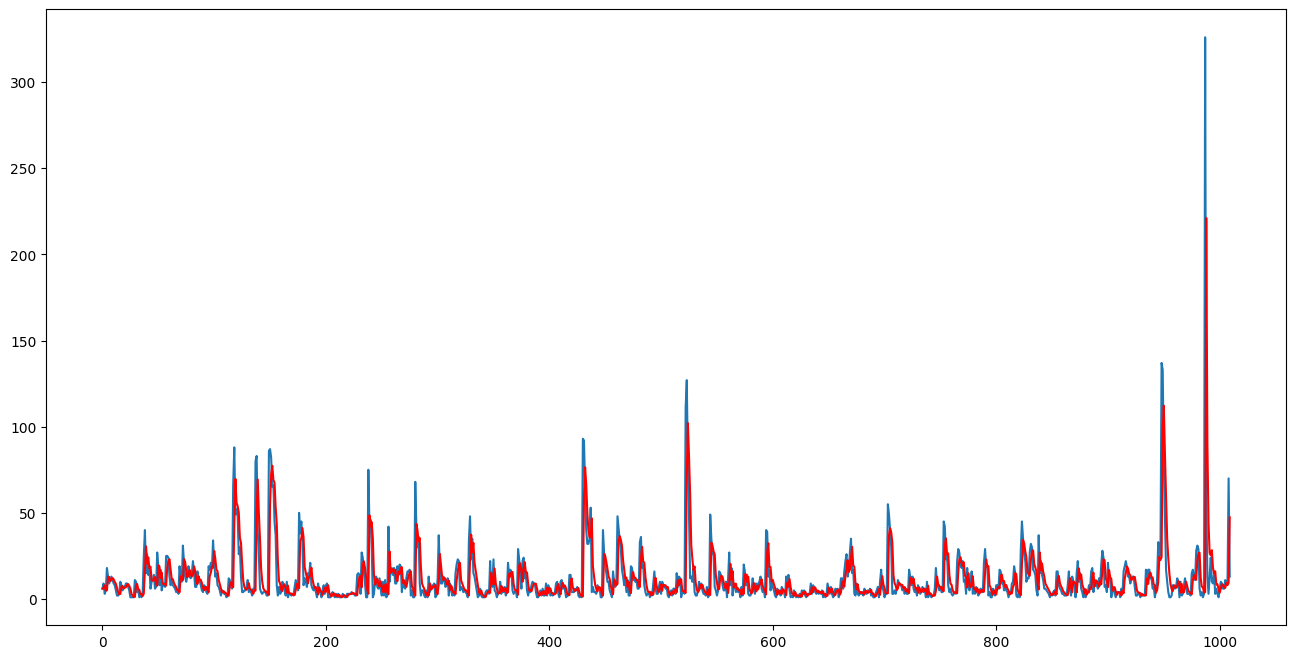

In [ ]:
rmse = math.sqrt(mean_squared_error(test_, predictions))
print('Test RMSE: %.3f' % rmse)
print("R2 score  :", r2_score(test_, predictions))
print("MSE score  :", mean_squared_error(test_, predictions))
print("MAE score :", mean_absolute_error(test_, predictions))

plt.figure(figsize=(16,8))
plt.plot(test["q_sold"].reset_index(drop = True))
plt.plot(predictions, color='red')
plt.show()

  8%|▊         | 23/299 [00:03<00:52,  5.25it/s]/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 10%|█         | 31/299 [00:04<00:34,  7.79it/s]/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
100%|██████████| 299/299 [00:49<00:00,  6.01it/s]


R2 score  : 0.5315093915725797
MSE score  : 150.86907686781782
MAE score : 4.745918395791772
Test RMSE: 12.283


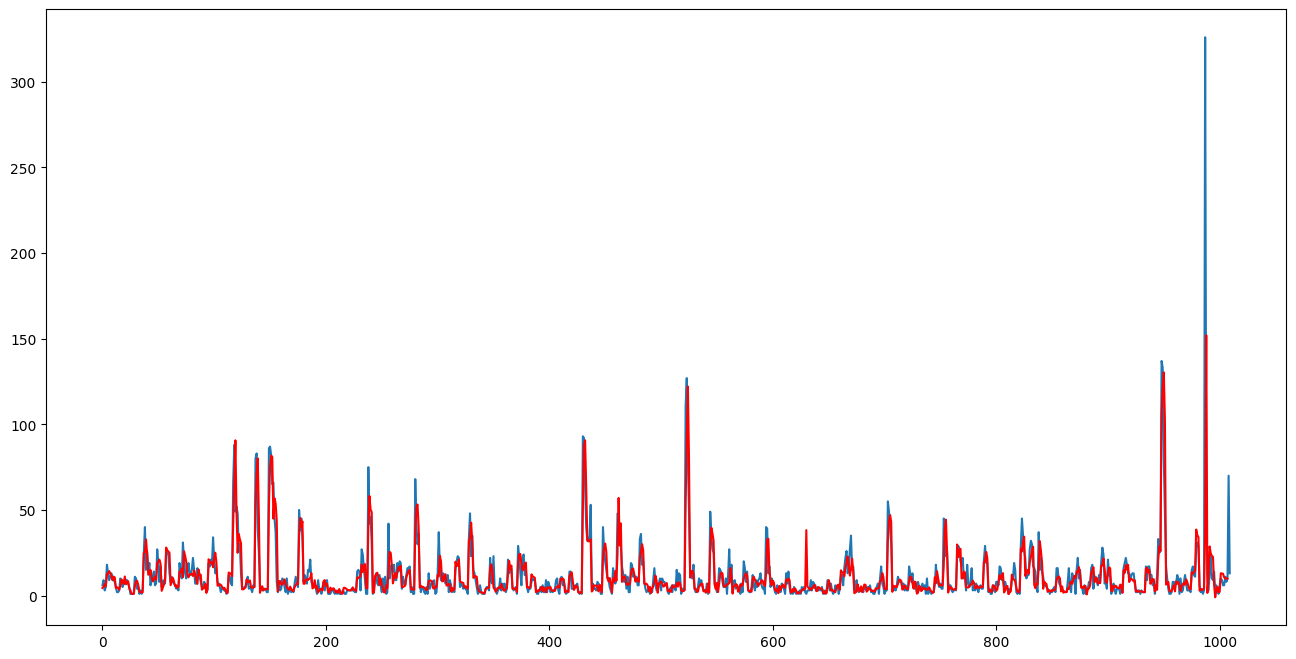

In [ ]:
predictions = list()
test_item = []
for item in tqdm(range(1,train.item.nunique())):
     history = X_train[X_train["item"] == item]["q_sold"].values.tolist()
     test_ = X_test[X_test["item"] == item]["q_sold"].values.tolist()
     if len(history) > 2:
          for index in range(len(test_)):
               model = ARIMA(history, order=(1,1,1))
               model_fit = model.fit()
               output = model_fit.forecast()
               y_pred = output[0]
               predictions.append(y_pred)
               obs = test_[index]
               history.append(obs)
          test_item.extend(test_)
         # print('predicted=%f, expected=%f' % (y_pred, obs))


rmse = sqrt(mean_squared_error(test_item, predictions))
print("R2 score  :", r2_score(test_item, predictions))
print("MSE score  :", mean_squared_error(test_item, predictions))
print("MAE score :", mean_absolute_error(test_item, predictions))
# print("MSLE score :", mean_squared_log_error(test_item, predictions))
print('Test RMSE: %.3f' % rmse)

plt.figure(figsize=(16,8))
plt.plot(test["q_sold"].reset_index(drop = True))
plt.plot(predictions, color='red')
plt.show()

## LSTM

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Reshape, Dropout, Dense,Multiply, Dot, Concatenate, Embedding, Flatten
from tensorflow.keras.models import load_model

from tensorflow.python import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
### Design API for custom LSTM model - 2023/03/14

class LSTM_model:

  def __init__(self,x_train=[], y_train=[], x_test=[], y_test=[], num_LSTM=[128,64], dropout_value = 0, mlp_num=[20,10,1], epochs=10,
               batch_size=16, input_shape=(9,1), loss='mse', optimizer='adam',
               metrics = 'mean_squared_error', patience_num=3, show_progress=True):
    self.num_LSTM = num_LSTM
    self.dropout_value = dropout_value
    self.mlp_num = mlp_num
    self.epochs = epochs
    self.batch_size = batch_size
    self.input_shape = input_shape
    self.loss = loss
    self.optimizer = optimizer
    self.metrics = metrics
    self.patience_num = patience_num
    self.show_progress = show_progress
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test

    if (len(self.x_train)==0):
      raise Exception("Please input the train data")
    if (len(self.y_train)==0):
      raise Exception ("Please input the label train data")

    self.lstm_model = Sequential()
    if len(self.num_LSTM) > 1:
      for i in self.num_LSTM:
        self.lstm_model.add(LSTM(i, input_shape=self.input_shape, return_sequences=True))
    else:
      self.lstm_model.add(LSTM(self.num_LSTM[0], input_shape=self.input_shape))
    self.lstm_model.add(Flatten())
    for i in self.mlp_num:
      self.lstm_model.add(Dropout(self.dropout_value))
      self.lstm_model.add(Dense(i, activation='relu'))

  def print_model_architecture(self):
    self.lstm_model.summary()

  def train_model(self):
    callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.patience_num)

    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='./ckpt/sentiment',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

    self.lstm_model.compile(loss=self.loss, optimizer=self.optimizer, metrics=self.metrics, run_eagerly=True)
    history = self.lstm_model.fit(self.x_train, self.y_train, validation_data=(self.x_test, self.y_test), batch_size= self.batch_size, epochs=self.epochs, callbacks=[callback, model_checkpoint_callback], verbose=self.show_progress)

    return self.lstm_model, history

  def predict(self,X_test):
    return self.lstm_model.predict(X_test)

X_train, y_train, X_test, y_test = split(df, method='by_date', regressor=True, sentiment=True, rating=True, n = 1)

lstm_model = LSTM_model(x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, num_LSTM=[16, 32], dropout_value = 0.1, mlp_num=[16,8,1], epochs=100,
               batch_size=32, input_shape=(X_train.shape[1], 1), loss='mse', optimizer='adam',
               metrics = ['mean_squared_error', 'mean_absolute_error', r2_score], patience_num=10, show_progress=True)

lstm_model.print_model_architecture()
model, hist = lstm_model.train_model()

100%|██████████| 300/300 [00:00<00:00, 1447.59it/s]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 16)             1152      
                                                                 
 lstm_3 (LSTM)               (None, 6, 32)             6272      
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dropout_3 (Dropout)         (None, 192)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                3088      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 59s 625ms/step - loss: 176.0191 - mean_squared_error: 176.0191 - mean_absolute_error: 8.4701 - r2_score: -0.3571 - val_loss: 190.6667 - val_mean_squared_error: 190.6667 - val_mean_absolute_error: 8.1366 - val_r2_score: nan
Epoch 2/100
95/95 [==============================] - ETA: 0s - loss: 115.5550 - mean_squared_error: 115.5550 - mean_absolute_error: 6.9708 - r2_score: 0.1023

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 69s 727ms/step - loss: 115.5550 - mean_squared_error: 115.5550 - mean_absolute_error: 6.9708 - r2_score: 0.1023 - val_loss: 120.3290 - val_mean_squared_error: 120.3290 - val_mean_absolute_error: 5.0404 - val_r2_score: nan
Epoch 3/100
95/95 [==============================] - ETA: 0s - loss: 77.5049 - mean_squared_error: 77.5049 - mean_absolute_error: 5.6964 - r2_score: 0.3219

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 59s 629ms/step - loss: 77.5049 - mean_squared_error: 77.5049 - mean_absolute_error: 5.6964 - r2_score: 0.3219 - val_loss: 102.5959 - val_mean_squared_error: 102.5959 - val_mean_absolute_error: 4.7559 - val_r2_score: nan
Epoch 4/100
95/95 [==============================] - ETA: 0s - loss: 71.0038 - mean_squared_error: 71.0038 - mean_absolute_error: 5.4646 - r2_score: 0.3924

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 69s 737ms/step - loss: 71.0038 - mean_squared_error: 71.0038 - mean_absolute_error: 5.4646 - r2_score: 0.3924 - val_loss: 94.9502 - val_mean_squared_error: 94.9502 - val_mean_absolute_error: 4.7824 - val_r2_score: nan
Epoch 5/100
95/95 [==============================] - ETA: 0s - loss: 73.5959 - mean_squared_error: 73.5959 - mean_absolute_error: 5.5322 - r2_score: 0.3237

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 69s 729ms/step - loss: 73.5959 - mean_squared_error: 73.5959 - mean_absolute_error: 5.5322 - r2_score: 0.3237 - val_loss: 94.0283 - val_mean_squared_error: 94.0283 - val_mean_absolute_error: 5.1383 - val_r2_score: nan
Epoch 6/100
95/95 [==============================] - ETA: 0s - loss: 64.7701 - mean_squared_error: 64.7701 - mean_absolute_error: 5.2557 - r2_score: 0.4680

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 58s 615ms/step - loss: 64.7701 - mean_squared_error: 64.7701 - mean_absolute_error: 5.2557 - r2_score: 0.4680 - val_loss: 94.2080 - val_mean_squared_error: 94.2080 - val_mean_absolute_error: 4.5659 - val_r2_score: nan
Epoch 7/100
95/95 [==============================] - ETA: 0s - loss: 65.4291 - mean_squared_error: 65.4291 - mean_absolute_error: 5.3100 - r2_score: 0.3909

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 54s 573ms/step - loss: 65.4291 - mean_squared_error: 65.4291 - mean_absolute_error: 5.3100 - r2_score: 0.3909 - val_loss: 92.8233 - val_mean_squared_error: 92.8233 - val_mean_absolute_error: 4.7617 - val_r2_score: nan
Epoch 8/100
95/95 [==============================] - ETA: 0s - loss: 64.1819 - mean_squared_error: 64.1819 - mean_absolute_error: 5.2137 - r2_score: 0.4203

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 70s 741ms/step - loss: 64.1819 - mean_squared_error: 64.1819 - mean_absolute_error: 5.2137 - r2_score: 0.4203 - val_loss: 88.9296 - val_mean_squared_error: 88.9296 - val_mean_absolute_error: 4.6421 - val_r2_score: nan
Epoch 9/100
95/95 [==============================] - ETA: 0s - loss: 64.7430 - mean_squared_error: 64.7430 - mean_absolute_error: 5.2313 - r2_score: 0.4085

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 53s 564ms/step - loss: 64.7430 - mean_squared_error: 64.7430 - mean_absolute_error: 5.2313 - r2_score: 0.4085 - val_loss: 87.8751 - val_mean_squared_error: 87.8751 - val_mean_absolute_error: 4.5887 - val_r2_score: nan
Epoch 10/100
95/95 [==============================] - 41s 438ms/step - loss: 63.5563 - mean_squared_error: 63.5563 - mean_absolute_error: 5.1678 - r2_score: 0.4444 - val_loss: 90.9038 - val_mean_squared_error: 90.9038 - val_mean_absolute_error: 4.6682 - val_r2_score: nan
Epoch 11/100


/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 65.1757 - mean_squared_error: 65.1757 - mean_absolute_error: 5.1964 - r2_score: 0.3805

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 52s 546ms/step - loss: 65.1757 - mean_squared_error: 65.1757 - mean_absolute_error: 5.1964 - r2_score: 0.3805 - val_loss: 87.0693 - val_mean_squared_error: 87.0693 - val_mean_absolute_error: 4.6653 - val_r2_score: nan
Epoch 12/100
95/95 [==============================] - ETA: 0s - loss: 66.6454 - mean_squared_error: 66.6454 - mean_absolute_error: 5.2615 - r2_score: 0.3902

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 60s 641ms/step - loss: 66.6454 - mean_squared_error: 66.6454 - mean_absolute_error: 5.2615 - r2_score: 0.3902 - val_loss: 88.2658 - val_mean_squared_error: 88.2658 - val_mean_absolute_error: 4.7561 - val_r2_score: nan
Epoch 13/100
95/95 [==============================] - 47s 500ms/step - loss: 64.6739 - mean_squared_error: 64.6739 - mean_absolute_error: 5.2429 - r2_score: 0.3691 - val_loss: 87.7691 - val_mean_squared_error: 87.7691 - val_mean_absolute_error: 4.4465 - val_r2_score: nan
Epoch 14/100
 1/95 [..............................] - ETA: 15s - loss: 40.0082 - mean_squared_error: 40.0082 - mean_absolute_error: 4.6635 - r2_score: 0.6093

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 60.1611 - mean_squared_error: 60.1611 - mean_absolute_error: 5.0326 - r2_score: 0.4452

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 59s 621ms/step - loss: 60.1611 - mean_squared_error: 60.1611 - mean_absolute_error: 5.0326 - r2_score: 0.4452 - val_loss: 87.4287 - val_mean_squared_error: 87.4287 - val_mean_absolute_error: 4.4259 - val_r2_score: nan
Epoch 15/100
95/95 [==============================] - ETA: 0s - loss: 63.1980 - mean_squared_error: 63.1980 - mean_absolute_error: 5.1400 - r2_score: 0.4575

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 70s 741ms/step - loss: 63.1980 - mean_squared_error: 63.1980 - mean_absolute_error: 5.1400 - r2_score: 0.4575 - val_loss: 82.3467 - val_mean_squared_error: 82.3467 - val_mean_absolute_error: 4.3954 - val_r2_score: nan
Epoch 16/100
95/95 [==============================] - 44s 463ms/step - loss: 62.3994 - mean_squared_error: 62.3994 - mean_absolute_error: 5.1071 - r2_score: 0.4426 - val_loss: 84.5241 - val_mean_squared_error: 84.5241 - val_mean_absolute_error: 4.4883 - val_r2_score: nan
Epoch 17/100


/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 58.4987 - mean_squared_error: 58.4987 - mean_absolute_error: 5.0273 - r2_score: 0.4733

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 58s 611ms/step - loss: 58.4987 - mean_squared_error: 58.4987 - mean_absolute_error: 5.0273 - r2_score: 0.4733 - val_loss: 86.7694 - val_mean_squared_error: 86.7694 - val_mean_absolute_error: 4.4252 - val_r2_score: nan
Epoch 18/100
95/95 [==============================] - 43s 461ms/step - loss: 59.4340 - mean_squared_error: 59.4340 - mean_absolute_error: 5.0623 - r2_score: 0.4586 - val_loss: 85.5776 - val_mean_squared_error: 85.5776 - val_mean_absolute_error: 4.3935 - val_r2_score: nan
Epoch 19/100
 1/95 [..............................] - ETA: 14s - loss: 19.9105 - mean_squared_error: 19.9105 - mean_absolute_error: 3.2859 - r2_score: 0.6269

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 61.1298 - mean_squared_error: 61.1298 - mean_absolute_error: 5.0856 - r2_score: 0.4427

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 57s 610ms/step - loss: 61.1298 - mean_squared_error: 61.1298 - mean_absolute_error: 5.0856 - r2_score: 0.4427 - val_loss: 92.8801 - val_mean_squared_error: 92.8801 - val_mean_absolute_error: 4.4497 - val_r2_score: nan
Epoch 20/100
95/95 [==============================] - 44s 466ms/step - loss: 60.8260 - mean_squared_error: 60.8260 - mean_absolute_error: 5.0546 - r2_score: 0.4662 - val_loss: 89.5792 - val_mean_squared_error: 89.5792 - val_mean_absolute_error: 4.4397 - val_r2_score: nan
Epoch 21/100


/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 61.4970 - mean_squared_error: 61.4970 - mean_absolute_error: 5.0718 - r2_score: 0.4563

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 59s 622ms/step - loss: 61.4970 - mean_squared_error: 61.4970 - mean_absolute_error: 5.0718 - r2_score: 0.4563 - val_loss: 87.8776 - val_mean_squared_error: 87.8776 - val_mean_absolute_error: 4.3904 - val_r2_score: nan
Epoch 22/100
95/95 [==============================] - ETA: 0s - loss: 60.5860 - mean_squared_error: 60.5860 - mean_absolute_error: 5.0077 - r2_score: 0.4768

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 54s 570ms/step - loss: 60.5860 - mean_squared_error: 60.5860 - mean_absolute_error: 5.0077 - r2_score: 0.4768 - val_loss: 82.1200 - val_mean_squared_error: 82.1200 - val_mean_absolute_error: 4.5354 - val_r2_score: nan
Epoch 23/100
95/95 [==============================] - ETA: 0s - loss: 58.9595 - mean_squared_error: 58.9595 - mean_absolute_error: 5.0308 - r2_score: 0.4491

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 59s 624ms/step - loss: 58.9595 - mean_squared_error: 58.9595 - mean_absolute_error: 5.0308 - r2_score: 0.4491 - val_loss: 83.8089 - val_mean_squared_error: 83.8089 - val_mean_absolute_error: 4.5411 - val_r2_score: nan
Epoch 24/100
95/95 [==============================] - ETA: 0s - loss: 60.8040 - mean_squared_error: 60.8040 - mean_absolute_error: 5.0435 - r2_score: 0.4360

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 59s 622ms/step - loss: 60.8040 - mean_squared_error: 60.8040 - mean_absolute_error: 5.0435 - r2_score: 0.4360 - val_loss: 82.9079 - val_mean_squared_error: 82.9079 - val_mean_absolute_error: 4.4068 - val_r2_score: nan
Epoch 25/100
95/95 [==============================] - 49s 515ms/step - loss: 61.7100 - mean_squared_error: 61.7100 - mean_absolute_error: 5.1259 - r2_score: 0.4438 - val_loss: 83.9072 - val_mean_squared_error: 83.9072 - val_mean_absolute_error: 4.4208 - val_r2_score: nan
Epoch 26/100
 1/95 [..............................] - ETA: 15s - loss: 64.1910 - mean_squared_error: 64.1910 - mean_absolute_error: 5.4426 - r2_score: 0.5501

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 61.1263 - mean_squared_error: 61.1263 - mean_absolute_error: 5.0429 - r2_score: 0.4316

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 59s 622ms/step - loss: 61.1263 - mean_squared_error: 61.1263 - mean_absolute_error: 5.0429 - r2_score: 0.4316 - val_loss: 86.7341 - val_mean_squared_error: 86.7341 - val_mean_absolute_error: 4.5748 - val_r2_score: nan
Epoch 27/100
95/95 [==============================] - ETA: 0s - loss: 62.6083 - mean_squared_error: 62.6083 - mean_absolute_error: 5.1243 - r2_score: 0.4285

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 57s 607ms/step - loss: 62.6083 - mean_squared_error: 62.6083 - mean_absolute_error: 5.1243 - r2_score: 0.4285 - val_loss: 81.8599 - val_mean_squared_error: 81.8599 - val_mean_absolute_error: 4.4296 - val_r2_score: nan
Epoch 28/100
95/95 [==============================] - ETA: 0s - loss: 58.6863 - mean_squared_error: 58.6863 - mean_absolute_error: 4.9930 - r2_score: 0.4696

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 58s 611ms/step - loss: 58.6863 - mean_squared_error: 58.6863 - mean_absolute_error: 4.9930 - r2_score: 0.4696 - val_loss: 84.9356 - val_mean_squared_error: 84.9356 - val_mean_absolute_error: 4.3908 - val_r2_score: nan
Epoch 29/100
95/95 [==============================] - ETA: 0s - loss: 60.6704 - mean_squared_error: 60.6704 - mean_absolute_error: 5.0348 - r2_score: 0.4522

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 58s 617ms/step - loss: 60.6704 - mean_squared_error: 60.6704 - mean_absolute_error: 5.0348 - r2_score: 0.4522 - val_loss: 84.3640 - val_mean_squared_error: 84.3640 - val_mean_absolute_error: 4.5335 - val_r2_score: nan
Epoch 30/100
95/95 [==============================] - ETA: 0s - loss: 60.3005 - mean_squared_error: 60.3005 - mean_absolute_error: 5.0429 - r2_score: 0.4663

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 55s 580ms/step - loss: 60.3005 - mean_squared_error: 60.3005 - mean_absolute_error: 5.0429 - r2_score: 0.4663 - val_loss: 81.4506 - val_mean_squared_error: 81.4506 - val_mean_absolute_error: 4.4933 - val_r2_score: nan
Epoch 31/100
95/95 [==============================] - 43s 461ms/step - loss: 59.5043 - mean_squared_error: 59.5043 - mean_absolute_error: 5.0338 - r2_score: 0.4590 - val_loss: 87.7405 - val_mean_squared_error: 87.7405 - val_mean_absolute_error: 4.4060 - val_r2_score: nan
Epoch 32/100
 1/95 [..............................] - ETA: 14s - loss: 42.5396 - mean_squared_error: 42.5396 - mean_absolute_error: 4.3533 - r2_score: 0.7633

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 60.6977 - mean_squared_error: 60.6977 - mean_absolute_error: 5.0368 - r2_score: 0.4313

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 58s 611ms/step - loss: 60.6977 - mean_squared_error: 60.6977 - mean_absolute_error: 5.0368 - r2_score: 0.4313 - val_loss: 82.2789 - val_mean_squared_error: 82.2789 - val_mean_absolute_error: 4.7206 - val_r2_score: nan
Epoch 33/100
95/95 [==============================] - 43s 459ms/step - loss: 59.8964 - mean_squared_error: 59.8964 - mean_absolute_error: 5.0090 - r2_score: 0.4859 - val_loss: 81.5125 - val_mean_squared_error: 81.5125 - val_mean_absolute_error: 4.5673 - val_r2_score: nan
Epoch 34/100
 1/95 [..............................] - ETA: 15s - loss: 82.3500 - mean_squared_error: 82.3500 - mean_absolute_error: 6.1394 - r2_score: 0.3610

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 60.0267 - mean_squared_error: 60.0267 - mean_absolute_error: 5.0357 - r2_score: 0.4557

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 68s 727ms/step - loss: 60.0267 - mean_squared_error: 60.0267 - mean_absolute_error: 5.0357 - r2_score: 0.4557 - val_loss: 80.3074 - val_mean_squared_error: 80.3074 - val_mean_absolute_error: 4.3984 - val_r2_score: nan
Epoch 35/100
95/95 [==============================] - 49s 517ms/step - loss: 64.9048 - mean_squared_error: 64.9048 - mean_absolute_error: 5.2100 - r2_score: 0.3988 - val_loss: 83.8142 - val_mean_squared_error: 83.8142 - val_mean_absolute_error: 4.4061 - val_r2_score: nan
Epoch 36/100
 1/95 [..............................] - ETA: 16s - loss: 132.7611 - mean_squared_error: 132.7611 - mean_absolute_error: 5.9923 - r2_score: 0.2723

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 47s 502ms/step - loss: 58.2525 - mean_squared_error: 58.2525 - mean_absolute_error: 4.9698 - r2_score: 0.4560 - val_loss: 84.6461 - val_mean_squared_error: 84.6461 - val_mean_absolute_error: 4.3367 - val_r2_score: nan
Epoch 37/100
 1/95 [..............................] - ETA: 16s - loss: 45.9238 - mean_squared_error: 45.9238 - mean_absolute_error: 4.4395 - r2_score: 0.6083

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 60.2870 - mean_squared_error: 60.2870 - mean_absolute_error: 5.0288 - r2_score: 0.4409

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 59s 625ms/step - loss: 60.2870 - mean_squared_error: 60.2870 - mean_absolute_error: 5.0288 - r2_score: 0.4409 - val_loss: 83.0244 - val_mean_squared_error: 83.0244 - val_mean_absolute_error: 4.4144 - val_r2_score: nan
Epoch 38/100
95/95 [==============================] - ETA: 0s - loss: 62.4163 - mean_squared_error: 62.4163 - mean_absolute_error: 5.0751 - r2_score: 0.4642

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 60s 633ms/step - loss: 62.4163 - mean_squared_error: 62.4163 - mean_absolute_error: 5.0751 - r2_score: 0.4642 - val_loss: 84.1936 - val_mean_squared_error: 84.1936 - val_mean_absolute_error: 4.5168 - val_r2_score: nan
Epoch 39/100
95/95 [==============================] - 47s 498ms/step - loss: 58.4368 - mean_squared_error: 58.4368 - mean_absolute_error: 4.9844 - r2_score: 0.4857 - val_loss: 82.7839 - val_mean_squared_error: 82.7839 - val_mean_absolute_error: 4.3804 - val_r2_score: nan
Epoch 40/100
 1/95 [..............................] - ETA: 15s - loss: 104.7191 - mean_squared_error: 104.7191 - mean_absolute_error: 6.6194 - r2_score: 0.4662

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 60.1769 - mean_squared_error: 60.1769 - mean_absolute_error: 4.9646 - r2_score: 0.4411

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 59s 623ms/step - loss: 60.1769 - mean_squared_error: 60.1769 - mean_absolute_error: 4.9646 - r2_score: 0.4411 - val_loss: 81.8891 - val_mean_squared_error: 81.8891 - val_mean_absolute_error: 4.5337 - val_r2_score: nan
Epoch 41/100
95/95 [==============================] - ETA: 0s - loss: 58.3656 - mean_squared_error: 58.3656 - mean_absolute_error: 4.9650 - r2_score: 0.4566

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 70s 739ms/step - loss: 58.3656 - mean_squared_error: 58.3656 - mean_absolute_error: 4.9650 - r2_score: 0.4566 - val_loss: 79.5382 - val_mean_squared_error: 79.5382 - val_mean_absolute_error: 4.5014 - val_r2_score: nan
Epoch 42/100
95/95 [==============================] - 44s 470ms/step - loss: 58.2587 - mean_squared_error: 58.2587 - mean_absolute_error: 4.9722 - r2_score: 0.4573 - val_loss: 81.5124 - val_mean_squared_error: 81.5124 - val_mean_absolute_error: 4.5767 - val_r2_score: nan
Epoch 43/100
 1/95 [..............................] - ETA: 15s - loss: 39.8051 - mean_squared_error: 39.8051 - mean_absolute_error: 4.3409 - r2_score: 0.7828

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 60.6400 - mean_squared_error: 60.6400 - mean_absolute_error: 5.0578 - r2_score: 0.4609

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 58s 613ms/step - loss: 60.6400 - mean_squared_error: 60.6400 - mean_absolute_error: 5.0578 - r2_score: 0.4609 - val_loss: 84.6621 - val_mean_squared_error: 84.6621 - val_mean_absolute_error: 4.5302 - val_r2_score: nan
Epoch 44/100
95/95 [==============================] - 45s 472ms/step - loss: 59.9395 - mean_squared_error: 59.9395 - mean_absolute_error: 5.0494 - r2_score: 0.4508 - val_loss: 93.8614 - val_mean_squared_error: 93.8614 - val_mean_absolute_error: 4.5785 - val_r2_score: nan
Epoch 45/100
 1/95 [..............................] - ETA: 16s - loss: 45.8670 - mean_squared_error: 45.8670 - mean_absolute_error: 4.4076 - r2_score: 0.4633

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 44s 465ms/step - loss: 62.3338 - mean_squared_error: 62.3338 - mean_absolute_error: 5.1045 - r2_score: 0.4426 - val_loss: 85.1313 - val_mean_squared_error: 85.1313 - val_mean_absolute_error: 4.7461 - val_r2_score: nan
Epoch 46/100
 1/95 [..............................] - ETA: 15s - loss: 78.2844 - mean_squared_error: 78.2844 - mean_absolute_error: 5.4815 - r2_score: 0.3812

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 45s 480ms/step - loss: 60.5339 - mean_squared_error: 60.5339 - mean_absolute_error: 5.0005 - r2_score: 0.4115 - val_loss: 88.6122 - val_mean_squared_error: 88.6122 - val_mean_absolute_error: 4.4822 - val_r2_score: nan
Epoch 47/100


/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 46s 484ms/step - loss: 56.4934 - mean_squared_error: 56.4934 - mean_absolute_error: 4.9330 - r2_score: 0.4141 - val_loss: 79.5803 - val_mean_squared_error: 79.5803 - val_mean_absolute_error: 4.3590 - val_r2_score: nan
Epoch 48/100
 1/95 [..............................] - ETA: 15s - loss: 50.2368 - mean_squared_error: 50.2368 - mean_absolute_error: 5.3097 - r2_score: 0.6621

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 43s 460ms/step - loss: 58.3361 - mean_squared_error: 58.3361 - mean_absolute_error: 4.9661 - r2_score: 0.4992 - val_loss: 88.3202 - val_mean_squared_error: 88.3202 - val_mean_absolute_error: 4.4214 - val_r2_score: nan
Epoch 49/100
 1/95 [..............................] - ETA: 14s - loss: 40.0470 - mean_squared_error: 40.0470 - mean_absolute_error: 3.7110 - r2_score: 0.6679

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 43s 461ms/step - loss: 59.0591 - mean_squared_error: 59.0591 - mean_absolute_error: 5.0246 - r2_score: 0.4661 - val_loss: 80.0263 - val_mean_squared_error: 80.0263 - val_mean_absolute_error: 4.5230 - val_r2_score: nan
Epoch 50/100
 1/95 [..............................] - ETA: 14s - loss: 44.7827 - mean_squared_error: 44.7827 - mean_absolute_error: 4.9961 - r2_score: 0.2834

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 43s 458ms/step - loss: 59.5254 - mean_squared_error: 59.5254 - mean_absolute_error: 4.9632 - r2_score: 0.4667 - val_loss: 80.4494 - val_mean_squared_error: 80.4494 - val_mean_absolute_error: 4.6702 - val_r2_score: nan
Epoch 51/100
 1/95 [..............................] - ETA: 14s - loss: 139.1001 - mean_squared_error: 139.1001 - mean_absolute_error: 6.9108 - r2_score: -1.6139

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - ETA: 0s - loss: 60.6142 - mean_squared_error: 60.6142 - mean_absolute_error: 5.0108 - r2_score: 0.4324

/usr/local/lib/python3.9/dist-packages/tensorflow/python/autograph/impl/api.py:371: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  return py_builtins.overload_of(f)(*args)


95/95 [==============================] - 58s 610ms/step - loss: 60.6142 - mean_squared_error: 60.6142 - mean_absolute_error: 5.0108 - r2_score: 0.4324 - val_loss: 84.6298 - val_mean_squared_error: 84.6298 - val_mean_absolute_error: 4.4559 - val_r2_score: nan


In [ ]:
print(min(hist.history['val_loss']))
print(min(hist.history['val_mean_absolute_error']))
print(max(hist.history['val_r2_score']))

78.80146789550781
4.326005935668945
nan


In [ ]:
def gen_arima(df):
    train, test = df[df["datetime"] <= "2023-03-14"],df[df["datetime"] > "2023-03-14"]
    X_train, y_train = train[["q_sold","item"]], train[["label", "item"]]
    X_test, y_test = test[["q_sold","item"]], test[["label", "item"]]
    valid_item = []
    X_train_ensemble, X_test_ensemble = [], []
    y_train_ensemble, y_test_ensemble = [], []
    for item in tqdm(range(1,301)):
        history = X_train[X_train["item"] == item]["q_sold"].values.tolist()
        test_ = X_test[X_test["item"] == item]["q_sold"].values.tolist()
        if len(history) > 2 and len(test_) > 1:
            valid_item.append(item)
            y_train_ensemble.append(y_train[y_train["item"] == item]["label"].values.tolist())
            y_test_ensemble.append(y_test[y_test["item"] == item]["label"].values.tolist())
            X_train_ensemble.append(ARIMA(history, order=(1,1,1)).fit().predict(start=1, end=len(history)))
            X_test_item = []
            for sample in range(len(test_)):
                X_test_item.append(ARIMA(history, order=(1,1,1)).fit().forecast()[0])
                history.append(test_[sample])
            X_test_ensemble.append(X_test_item)
    return X_train_ensemble, y_train_ensemble, X_test_ensemble, y_test_ensemble, valid_item

def gen_lstm(df, path, sentiment=True, rating=True, valid_item=None):
    train, test = [], []
    y_tr, y_te = [], []
    model = load_model(path, custom_objects={"r2_score": r2_score})
    for i in valid_item:
        X_train, y_train, X_test, y_test = split(df[df['item']==i], method='by_date', regressor=True, n = 1, sentiment=sentiment, rating=rating)
        train.append(model.predict(X_train))
        test.append(model.predict(X_test))
        y_tr.append(y_train)
        y_te.append(y_test)
    return train, y_tr, test, y_te

def ensemble(X_arima, X_lstm, y_train, X_test_arima, X_test_lstm, y_test):
    assert len(X_arima) == len(X_lstm) == len(y_train)
    cat_data, X_test = [], []
    X_arima = np.squeeze(np.array([i.tolist() for i in X_arima])).tolist()
    X_lstm = np.squeeze(np.array([np.squeeze(i).tolist() for i in X_lstm])).tolist()
    cat_data = [[X_arima[i][j], X_lstm[i][j]] for i in range(len(X_arima)) for j in range(len(X_arima[i]))]
    X_train = np.array(cat_data)
    y_train = np.array([[j] for i in y_train for j in i])
    X_test_lstm = np.squeeze(np.array([np.squeeze(i).tolist() for i in X_test_lstm])).tolist()
    for i in range(len(X_test_lstm)):
        for j in range(len(X_test_lstm[i])):
            X_test+=[[X_test_arima[i][j],X_test_lstm[i][j]]]
    X_test = [[X_test_arima[i][j], X_test_lstm[i][j]] for i in range(len(X_test_arima)) for j in range(len(X_test_arima[i]))]
    y_test = [[j] for i in y_test for j in i]
    clf = LinearRegression()
    clf.fit(X_train, y_train)

    y_hat = clf.predict(X_test)

    print("R2 score  :", r2_score(y_test, y_hat))
    print("MSE score  :", mean_squared_error(y_test, y_hat))
    print("MAE score :", mean_absolute_error(y_test, y_hat))
    print("RMSE: ", sqrt(mean_squared_error(y_test, y_hat)))

    return clf


In [ ]:
X_train_ensemble, y_train_ensemble, X_test_ensemble, y_test_ensemble, valid_item = gen_arima(df)

  1%|▏         | 4/300 [00:07<09:55,  2.01s/it]/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
  2%|▏         | 5/300 [00:09<09:52,  2.01s/it]/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
  5%|▌         | 16/300 [00:28<08:39,  1.83s/it]/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 12%|█▏        | 37/300 [01:08<08:37,  1.97s/it]/usr/local/lib/python3.9/dist-packages/sta

In [ ]:

train, y_tr, test, y_te = gen_lstm(df, path='./ckpt/sentiment', sentiment=True, rating=True, valid_item=valid_item)


100%|██████████| 300/300 [00:00<00:00, 1802.47it/s]


1/1 [==============================] - 0s 32ms/step


100%|██████████| 300/300 [00:00<00:00, 1607.60it/s]


1/1 [==============================] - 0s 31ms/step


100%|██████████| 300/300 [00:00<00:00, 1726.28it/s]


1/1 [==============================] - 0s 30ms/step


100%|██████████| 300/300 [00:00<00:00, 1660.58it/s]


1/1 [==============================] - 0s 30ms/step


100%|██████████| 300/300 [00:00<00:00, 1875.05it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1948.58it/s]


1/1 [==============================] - 0s 30ms/step


100%|██████████| 300/300 [00:00<00:00, 1676.67it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1951.70it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1786.13it/s]


1/1 [==============================] - 0s 31ms/step


100%|██████████| 300/300 [00:00<00:00, 1817.19it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1680.98it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1748.61it/s]


1/1 [==============================] - 0s 30ms/step


100%|██████████| 300/300 [00:00<00:00, 1754.02it/s]


1/1 [==============================] - 0s 35ms/step


100%|██████████| 300/300 [00:00<00:00, 1771.01it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1830.59it/s]


1/1 [==============================] - 0s 42ms/step


100%|██████████| 300/300 [00:00<00:00, 1176.19it/s]


1/1 [==============================] - 0s 39ms/step


100%|██████████| 300/300 [00:00<00:00, 1346.63it/s]


1/1 [==============================] - 0s 41ms/step


100%|██████████| 300/300 [00:00<00:00, 1334.36it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1242.40it/s]


1/1 [==============================] - 0s 39ms/step


100%|██████████| 300/300 [00:00<00:00, 1245.89it/s]


1/1 [==============================] - 0s 37ms/step


100%|██████████| 300/300 [00:00<00:00, 1389.53it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1750.81it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1686.77it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1538.30it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1821.12it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1812.95it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1740.10it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1827.59it/s]


1/1 [==============================] - 0s 31ms/step


100%|██████████| 300/300 [00:00<00:00, 1599.54it/s]


1/1 [==============================] - 0s 30ms/step


100%|██████████| 300/300 [00:00<00:00, 1831.75it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1672.44it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1685.06it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1564.75it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1702.16it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1608.60it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1989.75it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1653.19it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 2023.47it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1572.21it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1931.65it/s]


1/1 [==============================] - 0s 43ms/step


100%|██████████| 300/300 [00:00<00:00, 1300.84it/s]


1/1 [==============================] - 0s 39ms/step


100%|██████████| 300/300 [00:00<00:00, 1180.41it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1358.91it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1256.15it/s]


1/1 [==============================] - 0s 35ms/step


100%|██████████| 300/300 [00:00<00:00, 1217.20it/s]


1/1 [==============================] - 0s 40ms/step


100%|██████████| 300/300 [00:00<00:00, 1388.02it/s]

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1867.67it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1867.08it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1903.73it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1721.17it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1781.40it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1754.89it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1698.94it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1730.62it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1807.61it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1728.87it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1907.77it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1633.29it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1698.44it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1612.21it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1689.55it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1673.07it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1848.25it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1956.53it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1686.45it/s]


1/1 [==============================] - 0s 44ms/step


100%|██████████| 300/300 [00:00<00:00, 1177.70it/s]


1/1 [==============================] - 0s 37ms/step


100%|██████████| 300/300 [00:00<00:00, 1246.66it/s]


1/1 [==============================] - 0s 37ms/step


100%|██████████| 300/300 [00:00<00:00, 1185.35it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1265.87it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1359.57it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1255.99it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1686.78it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1867.77it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1979.88it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1784.89it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1708.69it/s]


1/1 [==============================] - 0s 32ms/step


100%|██████████| 300/300 [00:00<00:00, 1837.15it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1784.90it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1799.37it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1809.49it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1679.00it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1734.84it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1814.16it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1805.22it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1704.36it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1862.79it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1797.99it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1687.24it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1708.89it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1820.58it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1314.19it/s]


1/1 [==============================] - 0s 39ms/step


100%|██████████| 300/300 [00:00<00:00, 1319.44it/s]


1/1 [==============================] - 0s 37ms/step


100%|██████████| 300/300 [00:00<00:00, 1279.97it/s]


1/1 [==============================] - 0s 41ms/step


100%|██████████| 300/300 [00:00<00:00, 1361.76it/s]


1/1 [==============================] - 0s 40ms/step


100%|██████████| 300/300 [00:00<00:00, 1302.99it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1227.58it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 2063.36it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1793.03it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1732.57it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1768.04it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1876.53it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1722.04it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1844.85it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1776.57it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1831.28it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1950.34it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1629.81it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1764.30it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1756.28it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1842.46it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1671.69it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1805.90it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1732.33it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1940.72it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1801.67it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1186.48it/s]


1/1 [==============================] - 0s 47ms/step


100%|██████████| 300/300 [00:00<00:00, 1235.94it/s]


1/1 [==============================] - 0s 45ms/step


100%|██████████| 300/300 [00:00<00:00, 1250.79it/s]


1/1 [==============================] - 0s 41ms/step


100%|██████████| 300/300 [00:00<00:00, 1325.11it/s]


1/1 [==============================] - 0s 50ms/step


100%|██████████| 300/300 [00:00<00:00, 1371.89it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1130.83it/s]


1/1 [==============================] - 0s 41ms/step


100%|██████████| 300/300 [00:00<00:00, 1762.41it/s]


1/1 [==============================] - 0s 33ms/step


100%|██████████| 300/300 [00:00<00:00, 1657.55it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1715.68it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1773.61it/s]


1/1 [==============================] - 0s 32ms/step


100%|██████████| 300/300 [00:00<00:00, 1828.82it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1932.08it/s]


1/1 [==============================] - 0s 30ms/step


100%|██████████| 300/300 [00:00<00:00, 1766.25it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1696.22it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1742.76it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1838.41it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1854.92it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1811.60it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1868.56it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1658.62it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1960.12it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1730.82it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1840.85it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1721.89it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1859.87it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1969.31it/s]


1/1 [==============================] - 0s 41ms/step


100%|██████████| 300/300 [00:00<00:00, 1250.53it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1135.46it/s]


1/1 [==============================] - 0s 46ms/step


100%|██████████| 300/300 [00:00<00:00, 1280.55it/s]


1/1 [==============================] - 0s 35ms/step


100%|██████████| 300/300 [00:00<00:00, 1168.70it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1294.73it/s]


1/1 [==============================] - 0s 40ms/step


100%|██████████| 300/300 [00:00<00:00, 1327.27it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1663.16it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1749.22it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1634.82it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1909.77it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1735.53it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1891.68it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1608.56it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1808.73it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1603.11it/s]


1/1 [==============================] - 0s 32ms/step


100%|██████████| 300/300 [00:00<00:00, 1841.84it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1882.43it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1701.80it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1860.85it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1849.17it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1794.38it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1800.63it/s]


1/1 [==============================] - 0s 31ms/step


100%|██████████| 300/300 [00:00<00:00, 1821.07it/s]


1/1 [==============================] - 0s 30ms/step


100%|██████████| 300/300 [00:00<00:00, 1720.32it/s]


1/1 [==============================] - 0s 41ms/step


100%|██████████| 300/300 [00:00<00:00, 1659.83it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1253.93it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1377.67it/s]


1/1 [==============================] - 0s 35ms/step


100%|██████████| 300/300 [00:00<00:00, 1291.51it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1258.99it/s]


1/1 [==============================] - 0s 43ms/step


100%|██████████| 300/300 [00:00<00:00, 1259.29it/s]


1/1 [==============================] - 0s 45ms/step


100%|██████████| 300/300 [00:00<00:00, 1278.93it/s]


1/1 [==============================] - 0s 45ms/step


100%|██████████| 300/300 [00:00<00:00, 1759.83it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1873.89it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1669.21it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1625.63it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1622.28it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1559.06it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1792.40it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1827.53it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1927.95it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1826.68it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1656.58it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1737.23it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1777.14it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1866.90it/s]


1/1 [==============================] - 0s 33ms/step


100%|██████████| 300/300 [00:00<00:00, 1773.31it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1807.40it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1689.10it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1708.42it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1756.73it/s]


1/1 [==============================] - 0s 46ms/step


100%|██████████| 300/300 [00:00<00:00, 1041.97it/s]


1/1 [==============================] - 0s 35ms/step


100%|██████████| 300/300 [00:00<00:00, 1290.94it/s]


1/1 [==============================] - 0s 40ms/step


100%|██████████| 300/300 [00:00<00:00, 1302.23it/s]


1/1 [==============================] - 0s 37ms/step


100%|██████████| 300/300 [00:00<00:00, 1178.55it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1272.50it/s]


1/1 [==============================] - 0s 53ms/step


100%|██████████| 300/300 [00:00<00:00, 1286.86it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1741.37it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1814.29it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1569.02it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1746.59it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1741.85it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1750.94it/s]


1/1 [==============================] - 0s 31ms/step


100%|██████████| 300/300 [00:00<00:00, 1781.46it/s]


1/1 [==============================] - 0s 30ms/step


100%|██████████| 300/300 [00:00<00:00, 1738.32it/s]


1/1 [==============================] - 0s 33ms/step


100%|██████████| 300/300 [00:00<00:00, 1883.03it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1895.48it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1821.01it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1662.73it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1894.81it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1877.56it/s]


1/1 [==============================] - 0s 31ms/step


100%|██████████| 300/300 [00:00<00:00, 1641.02it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1548.18it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1776.33it/s]


1/1 [==============================] - 0s 33ms/step


100%|██████████| 300/300 [00:00<00:00, 1761.11it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1708.93it/s]


1/1 [==============================] - 0s 37ms/step


100%|██████████| 300/300 [00:00<00:00, 1239.30it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1309.24it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1353.68it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1288.61it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1247.68it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1228.19it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1835.79it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1818.37it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1741.03it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1754.80it/s]


1/1 [==============================] - 0s 30ms/step


100%|██████████| 300/300 [00:00<00:00, 1686.92it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1743.71it/s]


1/1 [==============================] - 0s 32ms/step


100%|██████████| 300/300 [00:00<00:00, 1815.18it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1698.81it/s]


1/1 [==============================] - 0s 33ms/step


100%|██████████| 300/300 [00:00<00:00, 1765.09it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1987.73it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1700.01it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1830.09it/s]


1/1 [==============================] - 0s 23ms/step


100%|██████████| 300/300 [00:00<00:00, 1771.35it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1858.32it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1723.21it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1736.21it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1976.85it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1967.34it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1620.85it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1226.41it/s]


1/1 [==============================] - 0s 43ms/step


100%|██████████| 300/300 [00:00<00:00, 1264.95it/s]


1/1 [==============================] - 0s 37ms/step


100%|██████████| 300/300 [00:00<00:00, 1251.94it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1277.53it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1094.41it/s]


1/1 [==============================] - 0s 57ms/step


100%|██████████| 300/300 [00:00<00:00, 1355.21it/s]


1/1 [==============================] - 0s 36ms/step


100%|██████████| 300/300 [00:00<00:00, 1181.27it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1774.13it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1730.14it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1778.17it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1575.92it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1677.67it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1589.59it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1742.51it/s]


1/1 [==============================] - 0s 33ms/step


100%|██████████| 300/300 [00:00<00:00, 1575.11it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1849.29it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1680.63it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1791.33it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1589.83it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1751.10it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1870.95it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1627.10it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1832.19it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1650.54it/s]


1/1 [==============================] - 0s 29ms/step


100%|██████████| 300/300 [00:00<00:00, 1714.32it/s]


1/1 [==============================] - 0s 31ms/step


100%|██████████| 300/300 [00:00<00:00, 1219.74it/s]


1/1 [==============================] - 0s 41ms/step


100%|██████████| 300/300 [00:00<00:00, 1300.81it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1332.05it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1337.52it/s]


1/1 [==============================] - 0s 39ms/step


100%|██████████| 300/300 [00:00<00:00, 1169.19it/s]


1/1 [==============================] - 0s 35ms/step


100%|██████████| 300/300 [00:00<00:00, 1401.25it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1146.37it/s]


1/1 [==============================] - 0s 41ms/step


100%|██████████| 300/300 [00:00<00:00, 1839.37it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1601.23it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1786.26it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1836.93it/s]


1/1 [==============================] - 0s 23ms/step


100%|██████████| 300/300 [00:00<00:00, 1785.14it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1873.25it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1658.94it/s]


1/1 [==============================] - 0s 27ms/step


100%|██████████| 300/300 [00:00<00:00, 1547.07it/s]


1/1 [==============================] - 0s 23ms/step


100%|██████████| 300/300 [00:00<00:00, 1606.80it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1602.70it/s]


1/1 [==============================] - 0s 25ms/step


100%|██████████| 300/300 [00:00<00:00, 1572.08it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1855.15it/s]


1/1 [==============================] - 0s 23ms/step


100%|██████████| 300/300 [00:00<00:00, 1791.03it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1647.67it/s]


1/1 [==============================] - 0s 32ms/step


100%|██████████| 300/300 [00:00<00:00, 1739.88it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1698.85it/s]


1/1 [==============================] - 0s 26ms/step


100%|██████████| 300/300 [00:00<00:00, 1845.35it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1826.47it/s]


1/1 [==============================] - 0s 28ms/step


100%|██████████| 300/300 [00:00<00:00, 1765.12it/s]


1/1 [==============================] - 0s 24ms/step


100%|██████████| 300/300 [00:00<00:00, 1216.47it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1313.18it/s]


1/1 [==============================] - 0s 39ms/step


100%|██████████| 300/300 [00:00<00:00, 1249.44it/s]


1/1 [==============================] - 0s 50ms/step


100%|██████████| 300/300 [00:00<00:00, 1303.51it/s]


1/1 [==============================] - 0s 38ms/step


100%|██████████| 300/300 [00:00<00:00, 1300.13it/s]


1/1 [==============================] - 0s 34ms/step


100%|██████████| 300/300 [00:00<00:00, 1314.80it/s]


1/1 [==============================] - 0s 41ms/step


In [ ]:
ensemble(X_train_ensemble, train, y_train_ensemble, X_test_ensemble, test, y_test_ensemble)

R2 score  : 0.583256658225638
MSE score  : 83.51838416166112
MAE score : 4.379706579668023
RMSE:  9.13883932245562


<ipython-input-18-4d459b1fa381>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_arima = np.squeeze(np.array([i.tolist() for i in X_arima])).tolist()
<ipython-input-18-4d459b1fa381>:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_lstm = np.squeeze(np.array([np.squeeze(i).tolist() for i in X_lstm])).tolist()
<ipython-input-18-4d459b1fa381>:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

LinearRegression()

# EDA

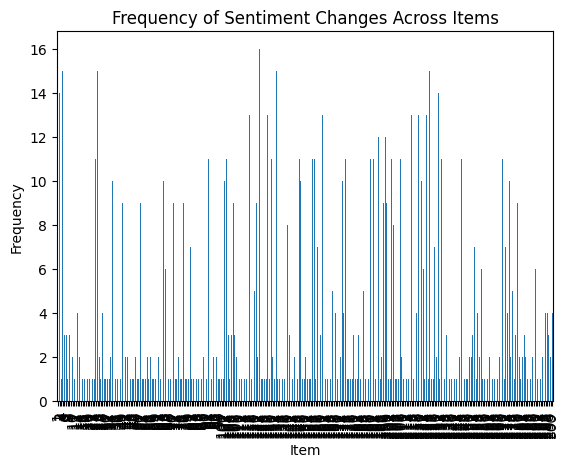

In [ ]:
freq = df.groupby("item")["avg_neg"].apply(lambda x: (x.diff() != 0).sum())

freq.plot(kind="bar")
plt.title("Frequency of Sentiment Changes Across Items")
plt.xlabel("Item")
plt.ylabel("Frequency")
plt.show()

In [ ]:
freq

item
1       2
2      14
3       1
4      15
5       3
       ..
296     4
297     4
298     3
299     2
300     4
Name: avg_neg, Length: 300, dtype: int64